<a href="https://colab.research.google.com/github/arunnbr17/ArunNambiar_Portfolio/blob/main/EPC_Productivity_ML/Productivity_Screen_Prediction_Pundits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
#!pip install openpyxl

file_path = "/content/MasterExtended2.xlsx"
employee_data = pd.read_excel(file_path)

employee_data.head()

ADH_Ref_ID PhaseCode   Date Crew_ID  ActualHours  ActualQuantity Weather_ID  \
0      A3600       P13  44411      C4         3.73          3313.8      W3600   
1      A3601       P46  44433     C18         3.73          3313.8      W3601   
2      A3602       P65  43998     C16         3.73          3313.8      W3602   
3      A3603       P25  44024     C11         3.73          3313.8      W3603   
4      A3604       P70  43952     C11         3.73          3313.8      W3604   

  Location  Rainfall_Index  Temperature  Productivity  
0       L1            30.5         26.3        888.42  
1       L1            30.5         26.3        888.42  
2       L1            30.5         26.3        888.42  
3       L1            30.5         26.3        888.42  
4       L1            30.5         26.3        888.42

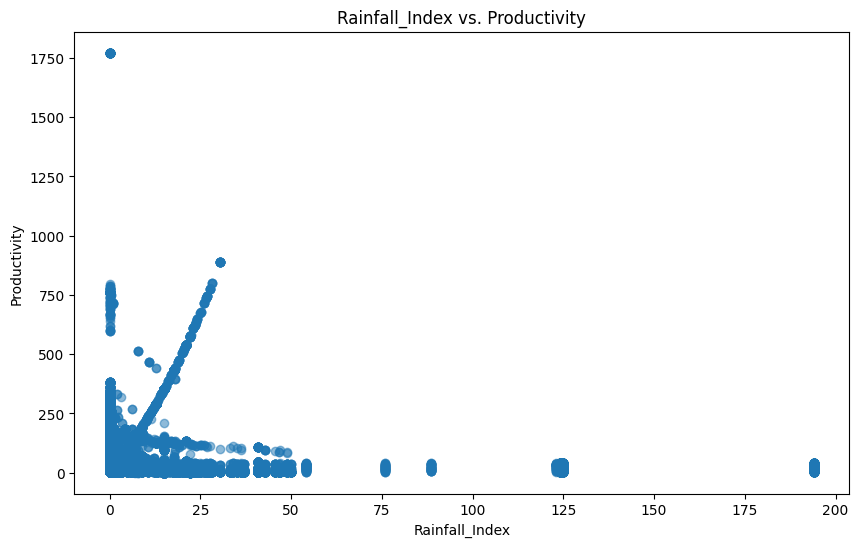

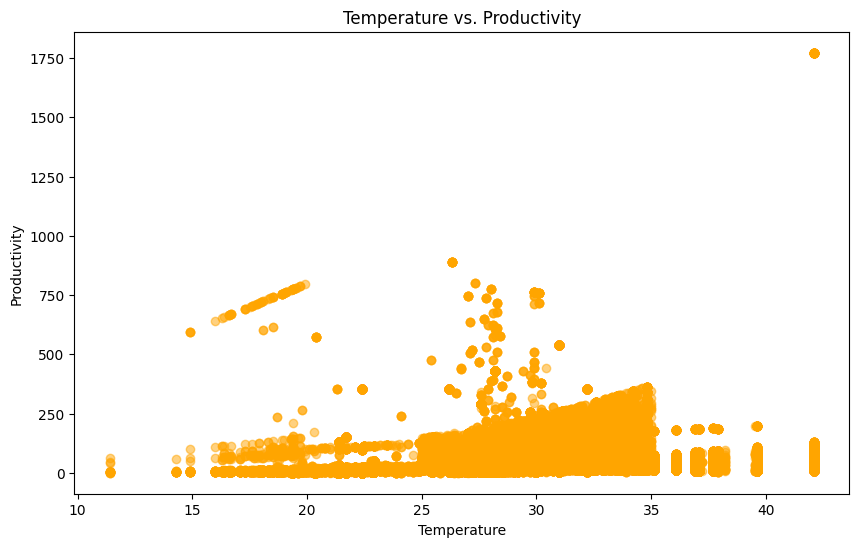

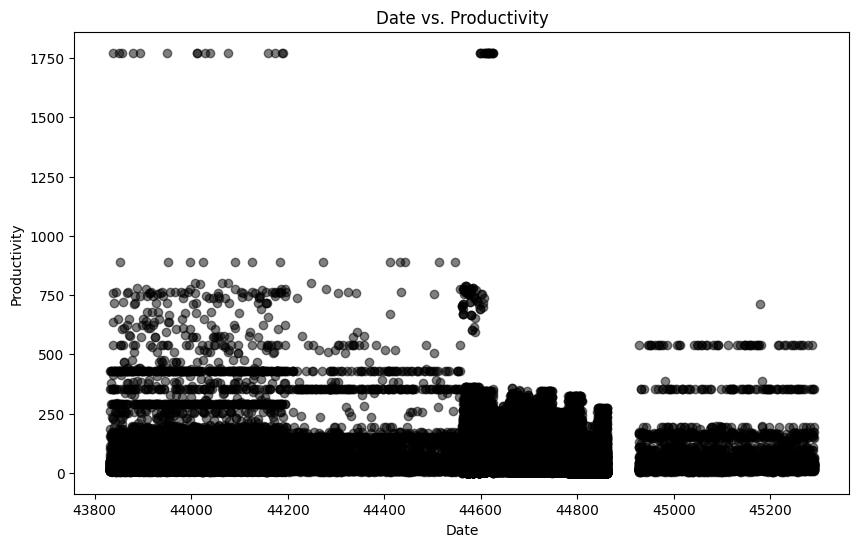

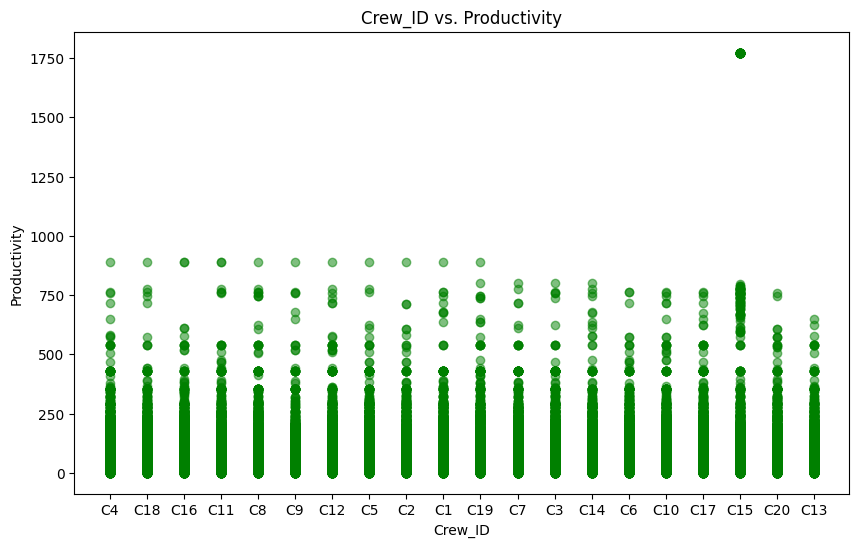

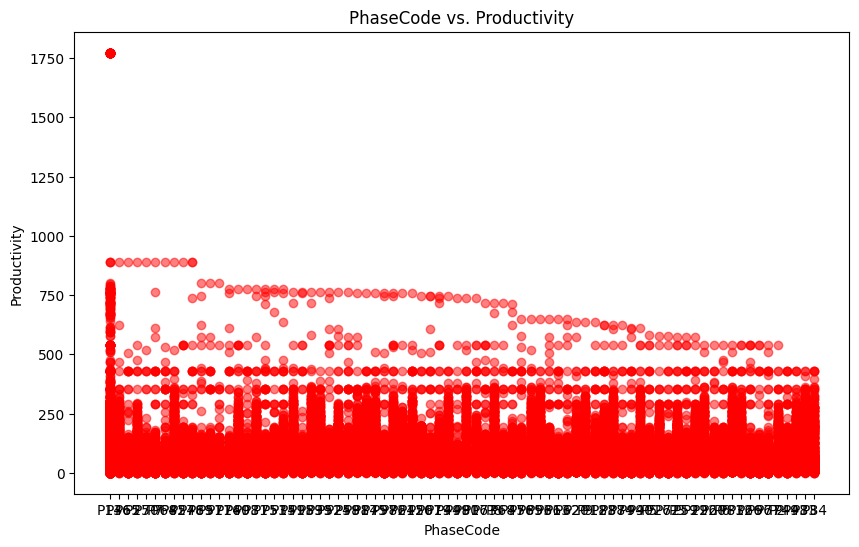

In [ ]:
rainfall_index = employee_data['Rainfall_Index']
productivity = employee_data['Productivity']
temperature = employee_data['Temperature']
crew = employee_data['Crew_ID']
phase = employee_data['PhaseCode']
date = employee_data['Date']

plt.figure(figsize=(10, 6))
plt.scatter(rainfall_index, productivity, alpha=0.5)
plt.title('Rainfall_Index vs. Productivity')
plt.xlabel('Rainfall_Index')
plt.ylabel('Productivity')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(temperature, productivity, alpha=0.5, color='orange')
plt.title('Temperature vs. Productivity')
plt.xlabel('Temperature')
plt.ylabel('Productivity')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(date, productivity, alpha=0.5, color='black')
plt.title('Date vs. Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(crew, productivity, alpha=0.5, color='green')
plt.title('Crew_ID vs. Productivity')
plt.xlabel('Crew_ID')
plt.ylabel('Productivity')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(phase, productivity, alpha=0.5, color='red')
plt.title('PhaseCode vs. Productivity')
plt.xlabel('PhaseCode')
plt.ylabel('Productivity')
plt.show()

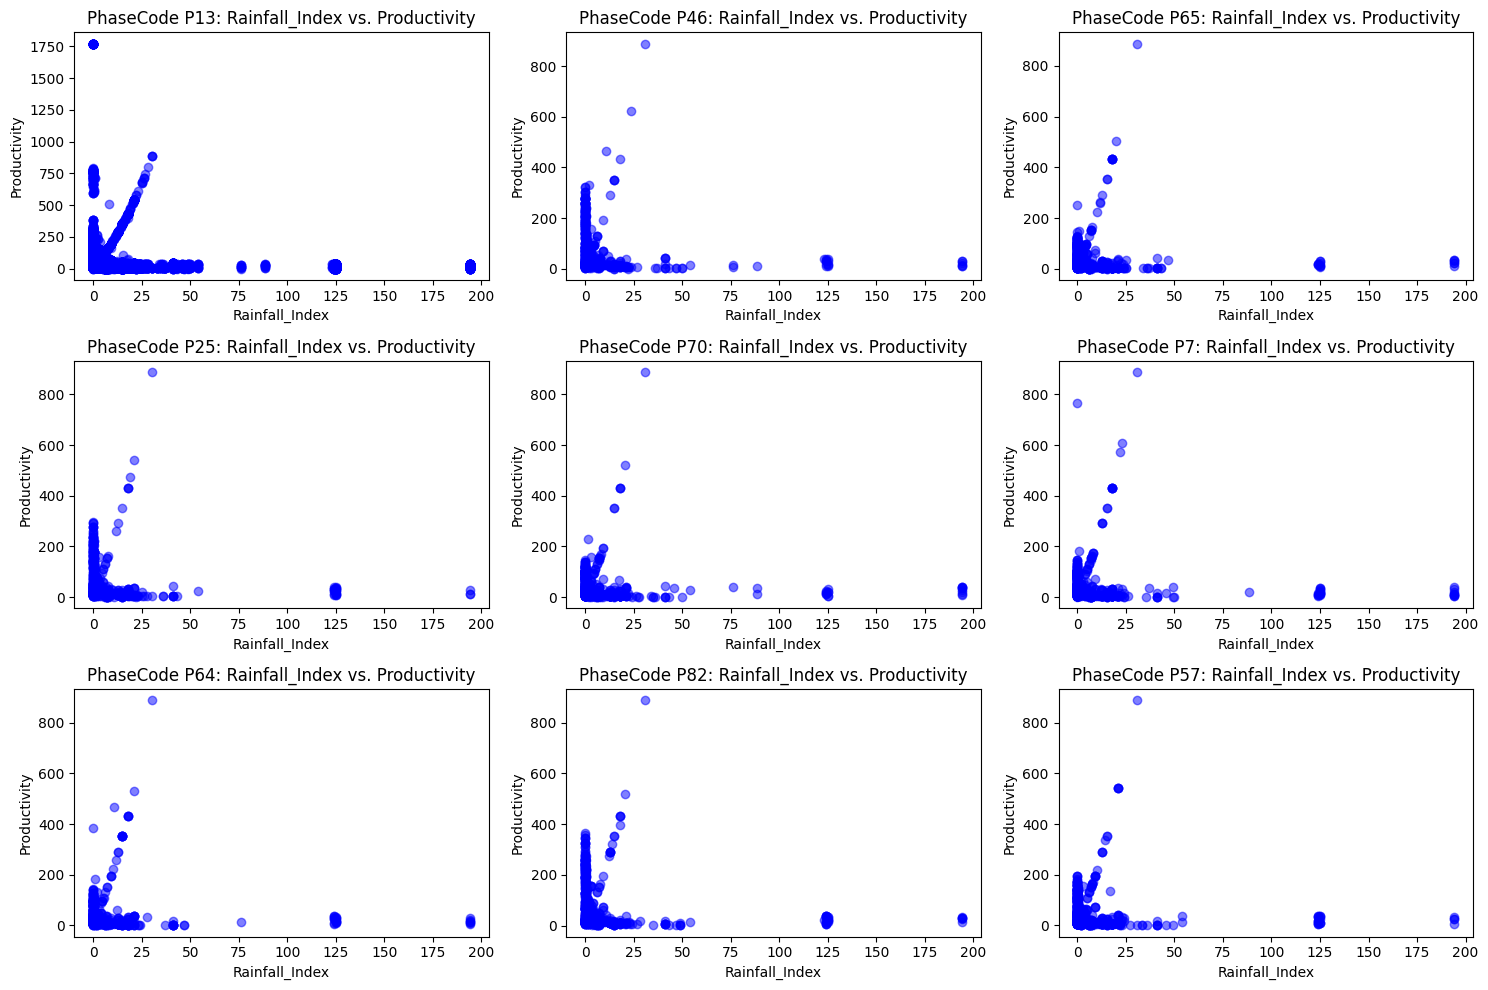

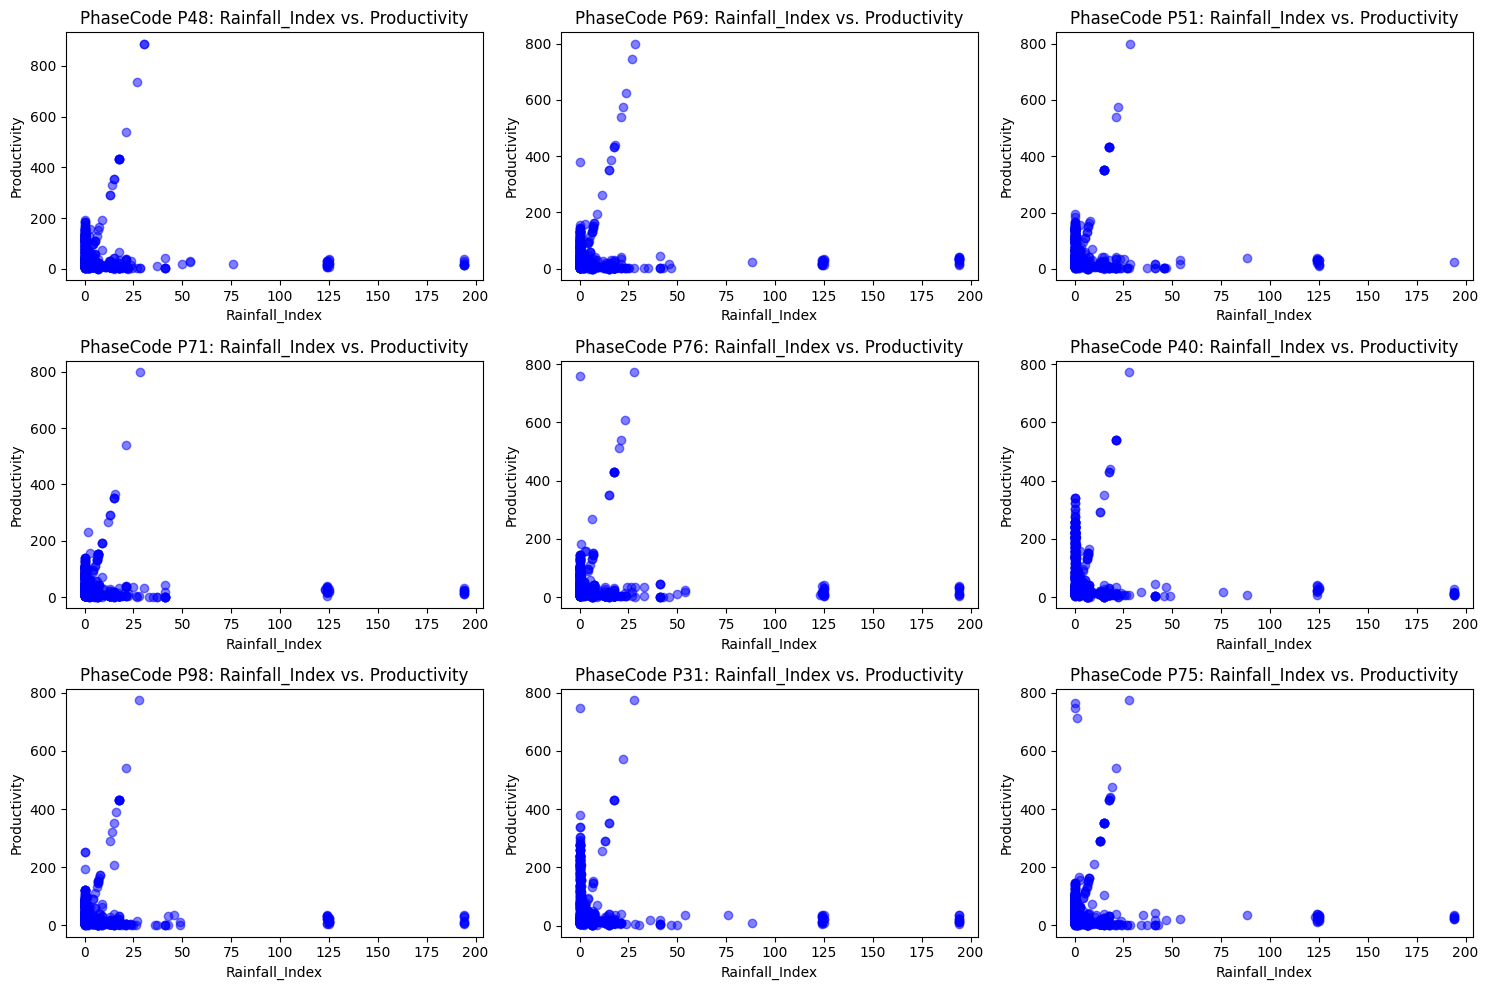

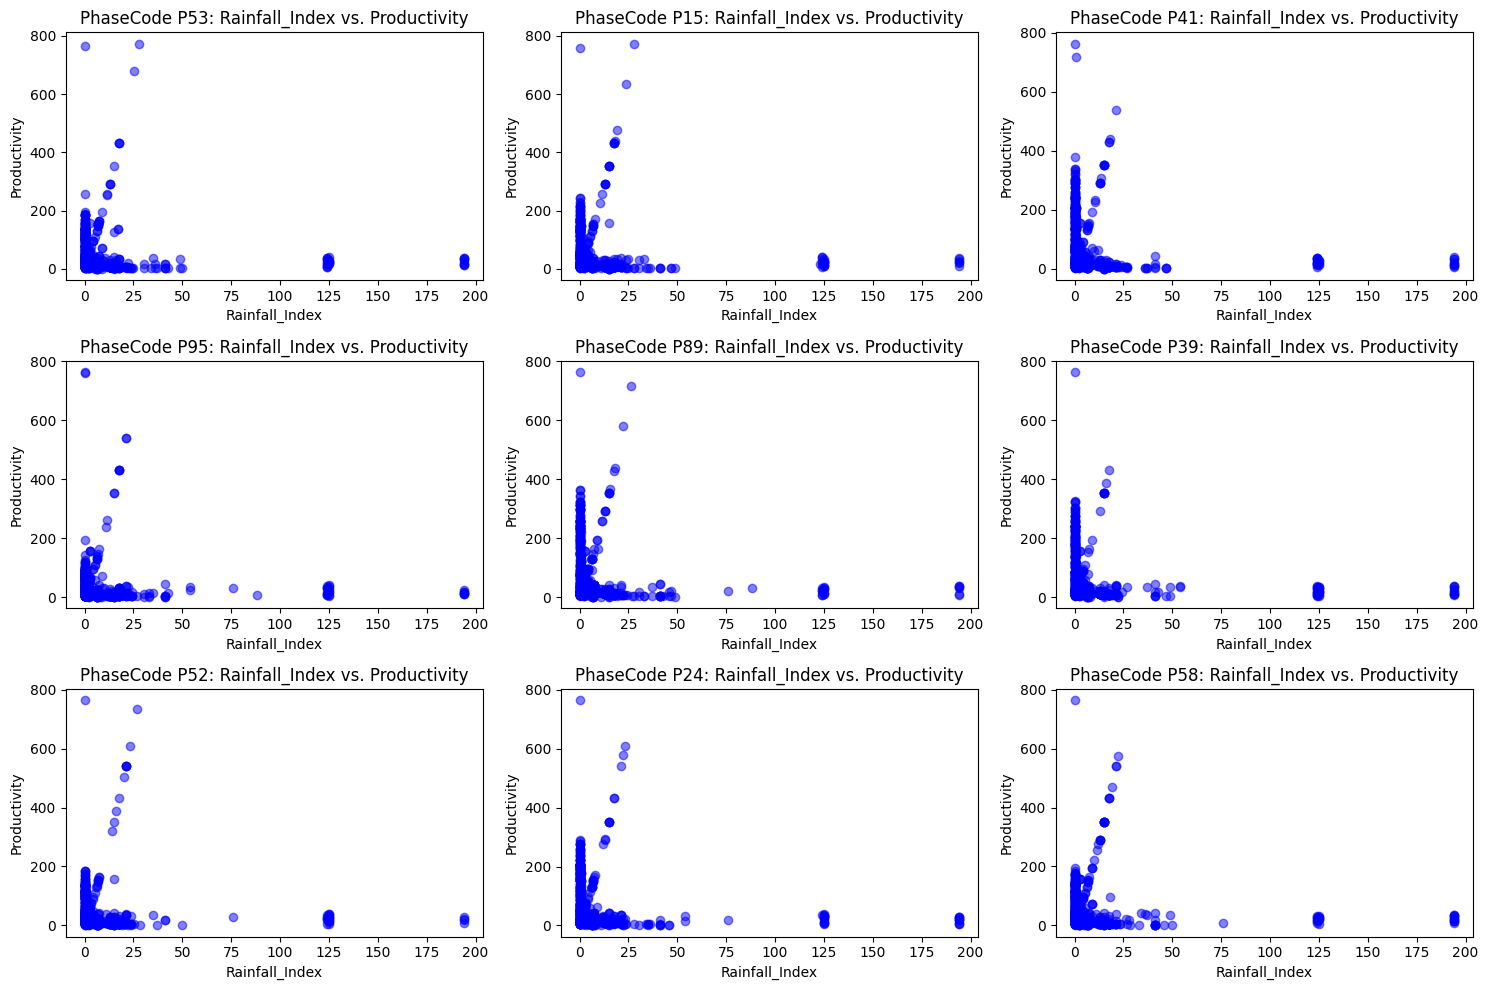

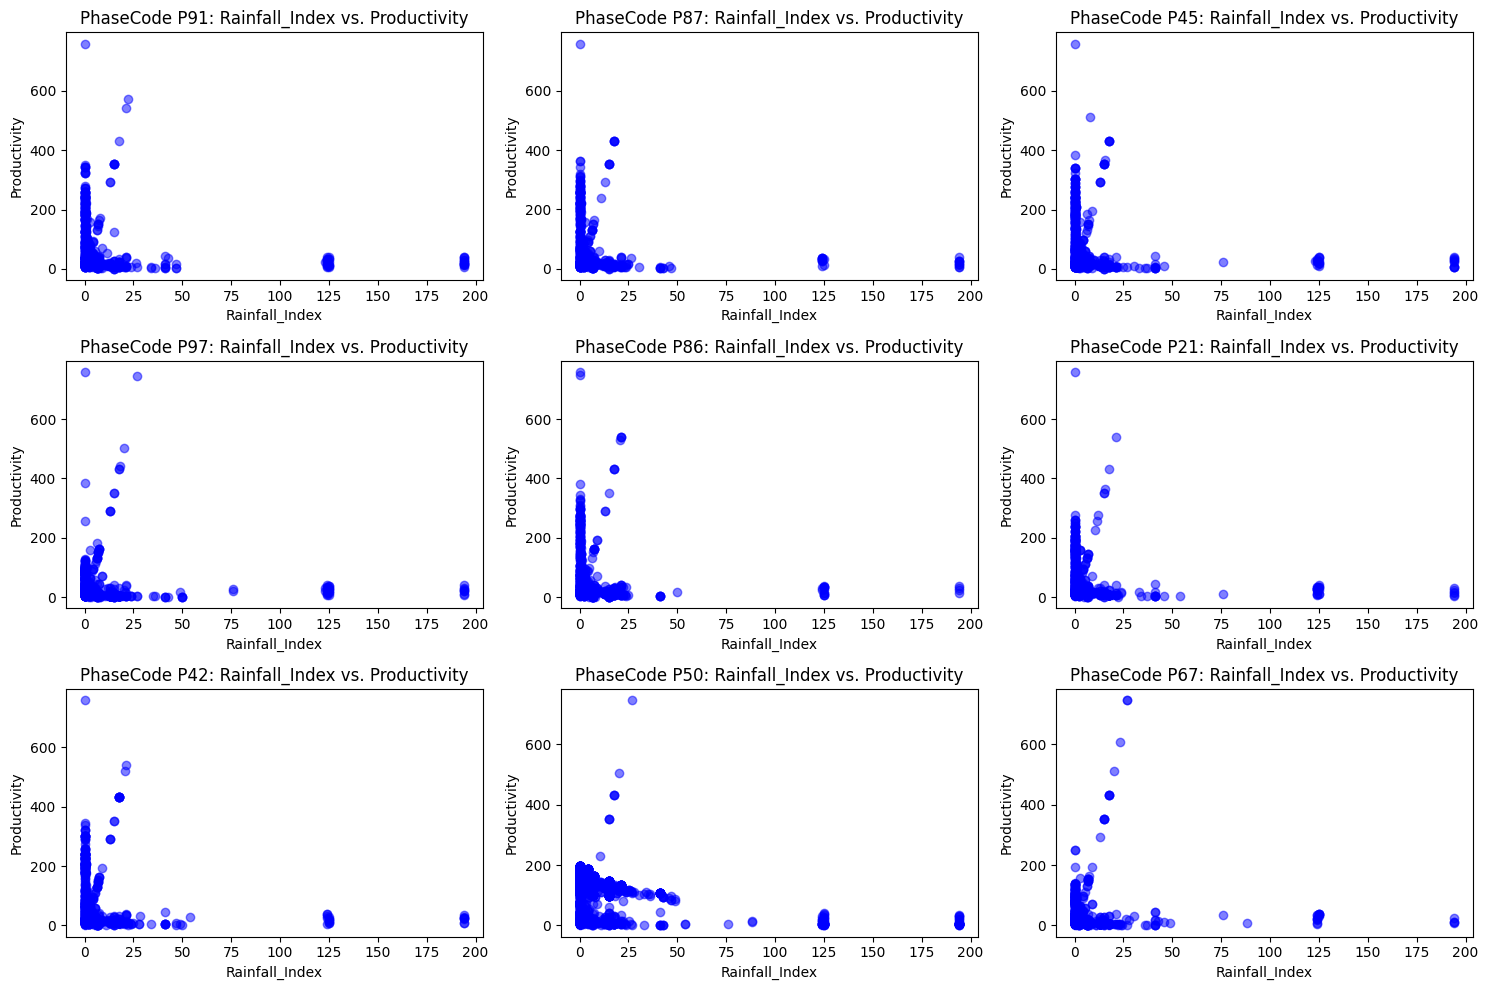

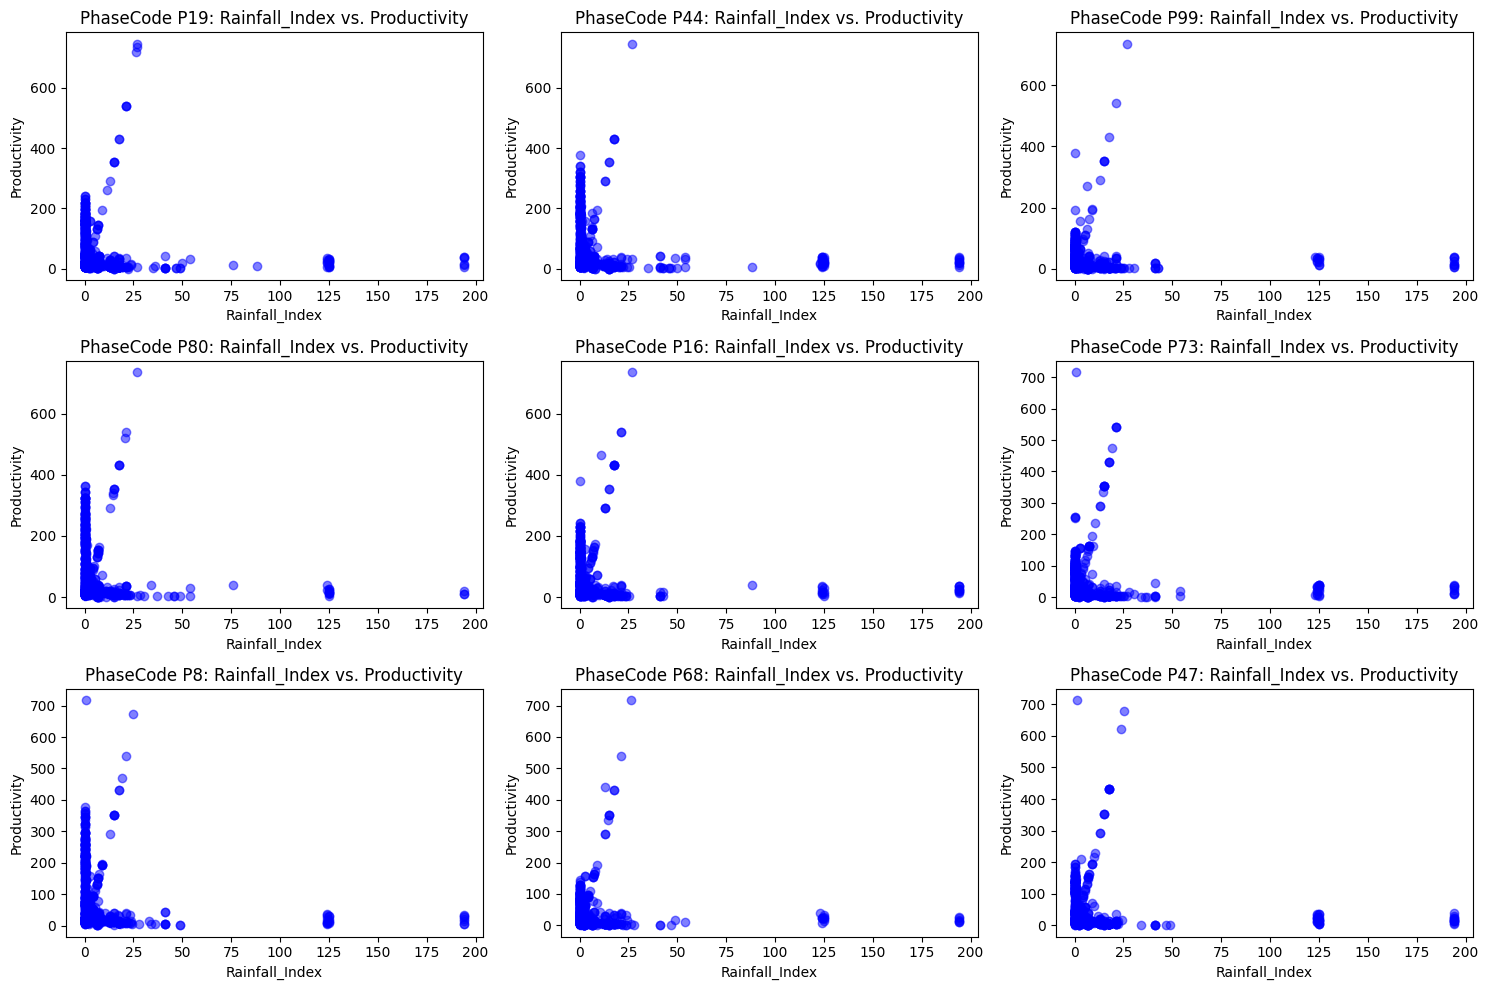

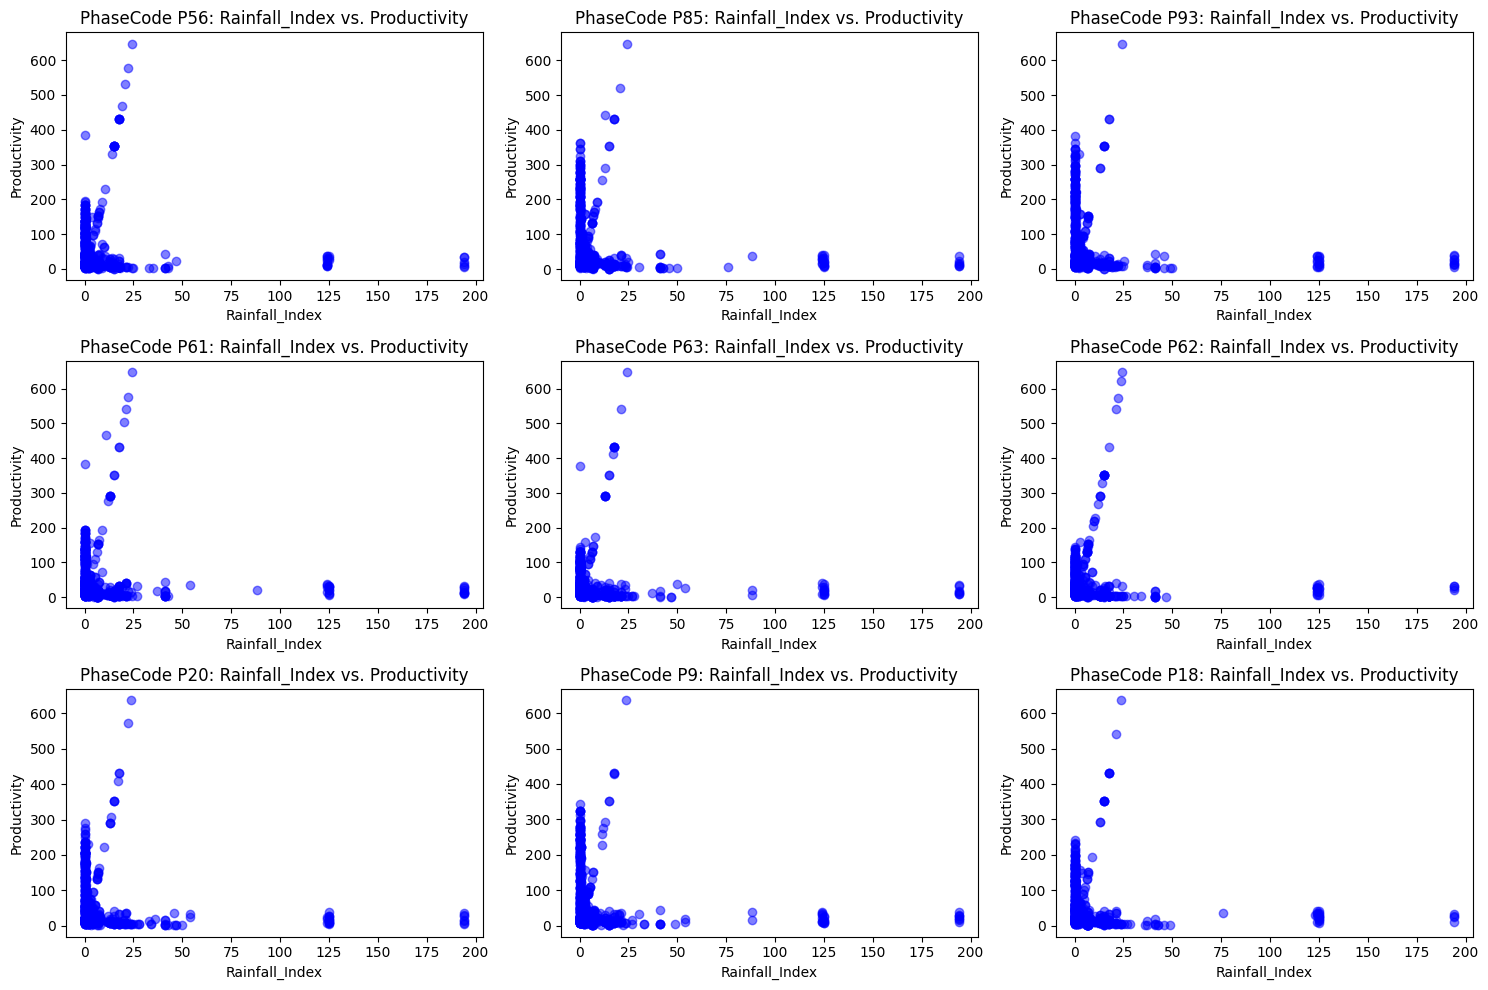

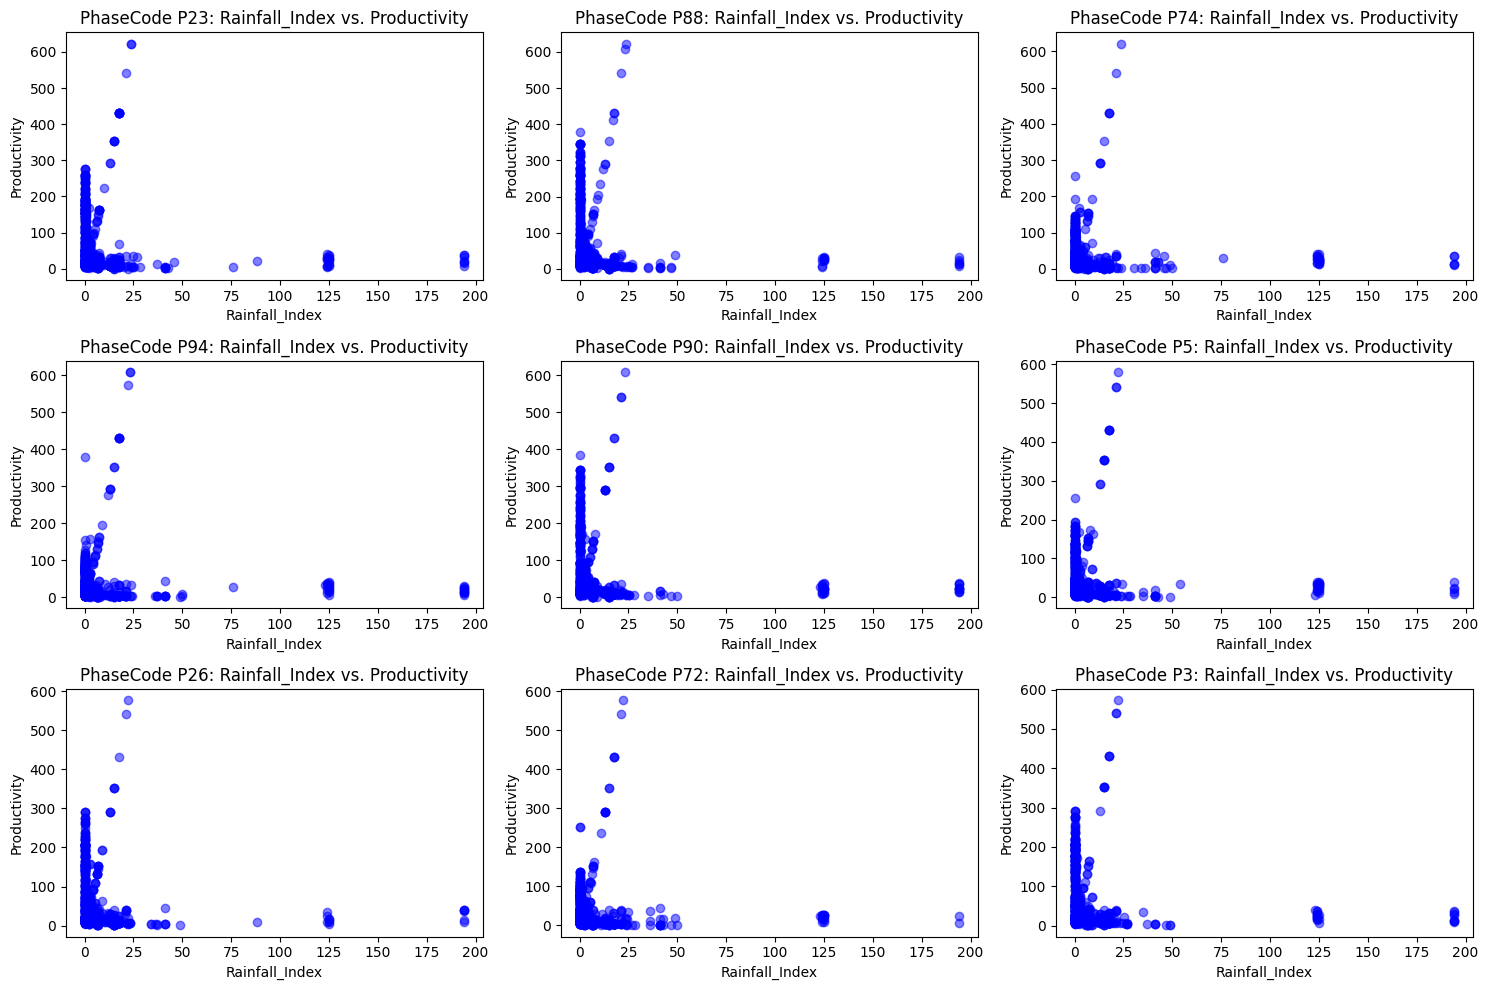

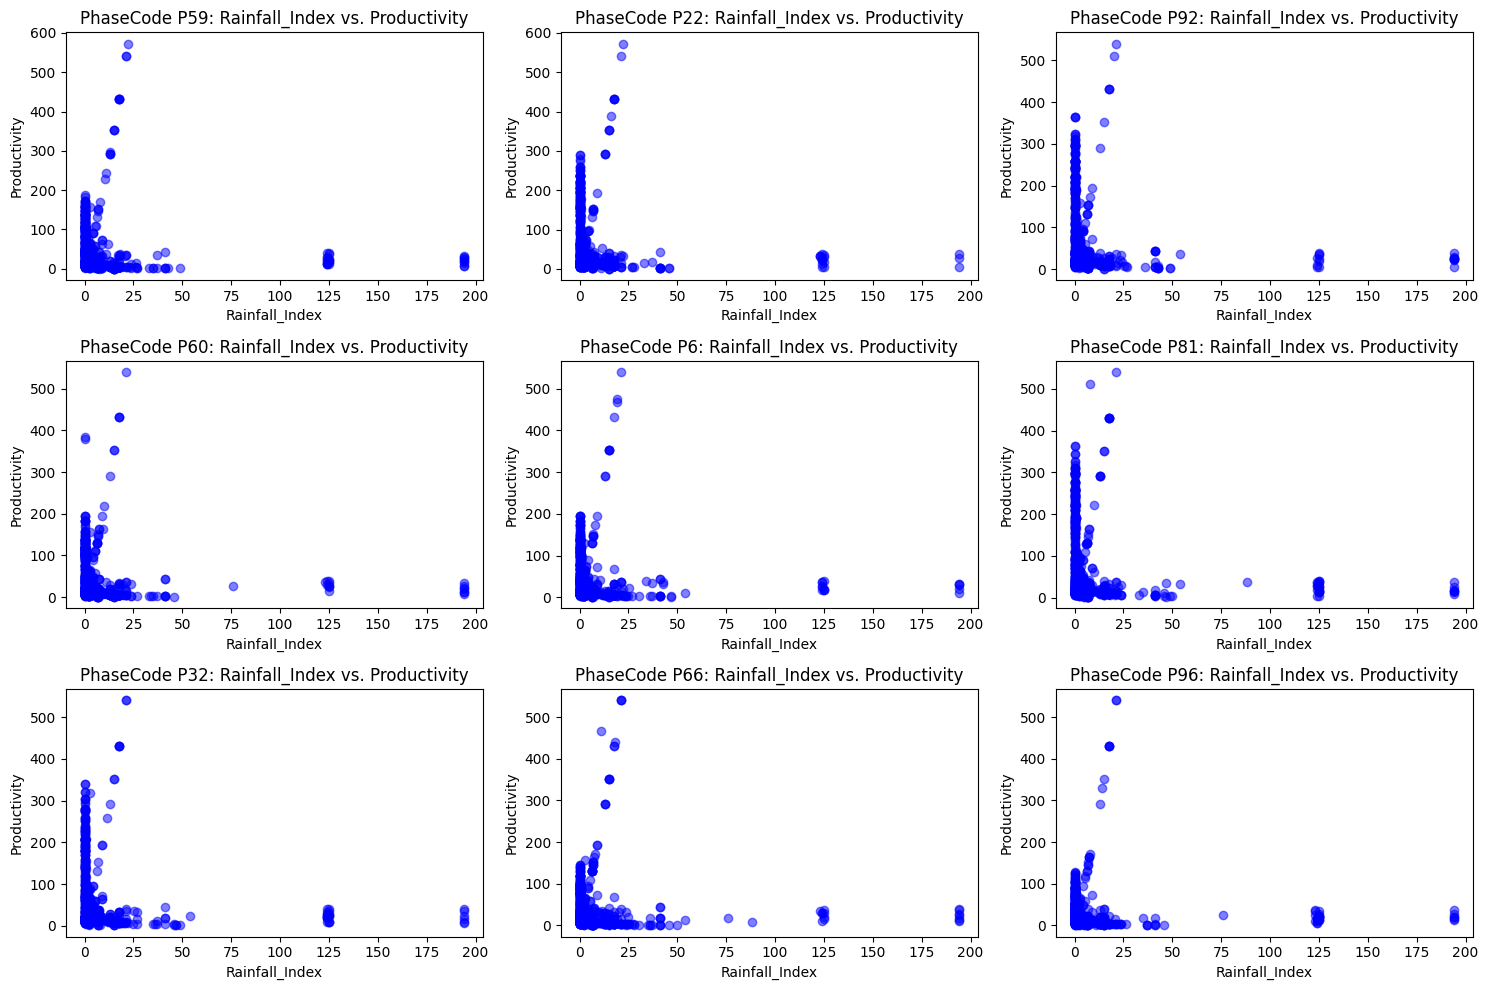

In [ ]:
import matplotlib.pyplot as plt

df = employee_data

phase_values = df["PhaseCode"].unique()

num_rows = 3
num_cols = 3

num_plots = len(phase_values)

plots_per_page = num_rows * num_cols

num_pages = (num_plots // plots_per_page)

for page in range(num_pages):
    start_index = page * plots_per_page
    end_index = min((page + 1) * plots_per_page, num_plots)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i, phase_index in enumerate(range(start_index, end_index)):
        row = i // num_cols
        col = i % num_cols

        phase_value = phase_values[phase_index]

        phase_data = df[df["PhaseCode"] == phase_value]

        rainfall_index = phase_data["Rainfall_Index"]
        productivity = phase_data["Productivity"]

        axs[row, col].scatter(rainfall_index, productivity, alpha=0.5, color='blue')
        axs[row, col].set_title(f'PhaseCode {phase_value}: Rainfall_Index vs. Productivity')
        axs[row, col].set_xlabel('Rainfall_Index')
        axs[row, col].set_ylabel('Productivity')

    plt.tight_layout()

    plt.show()


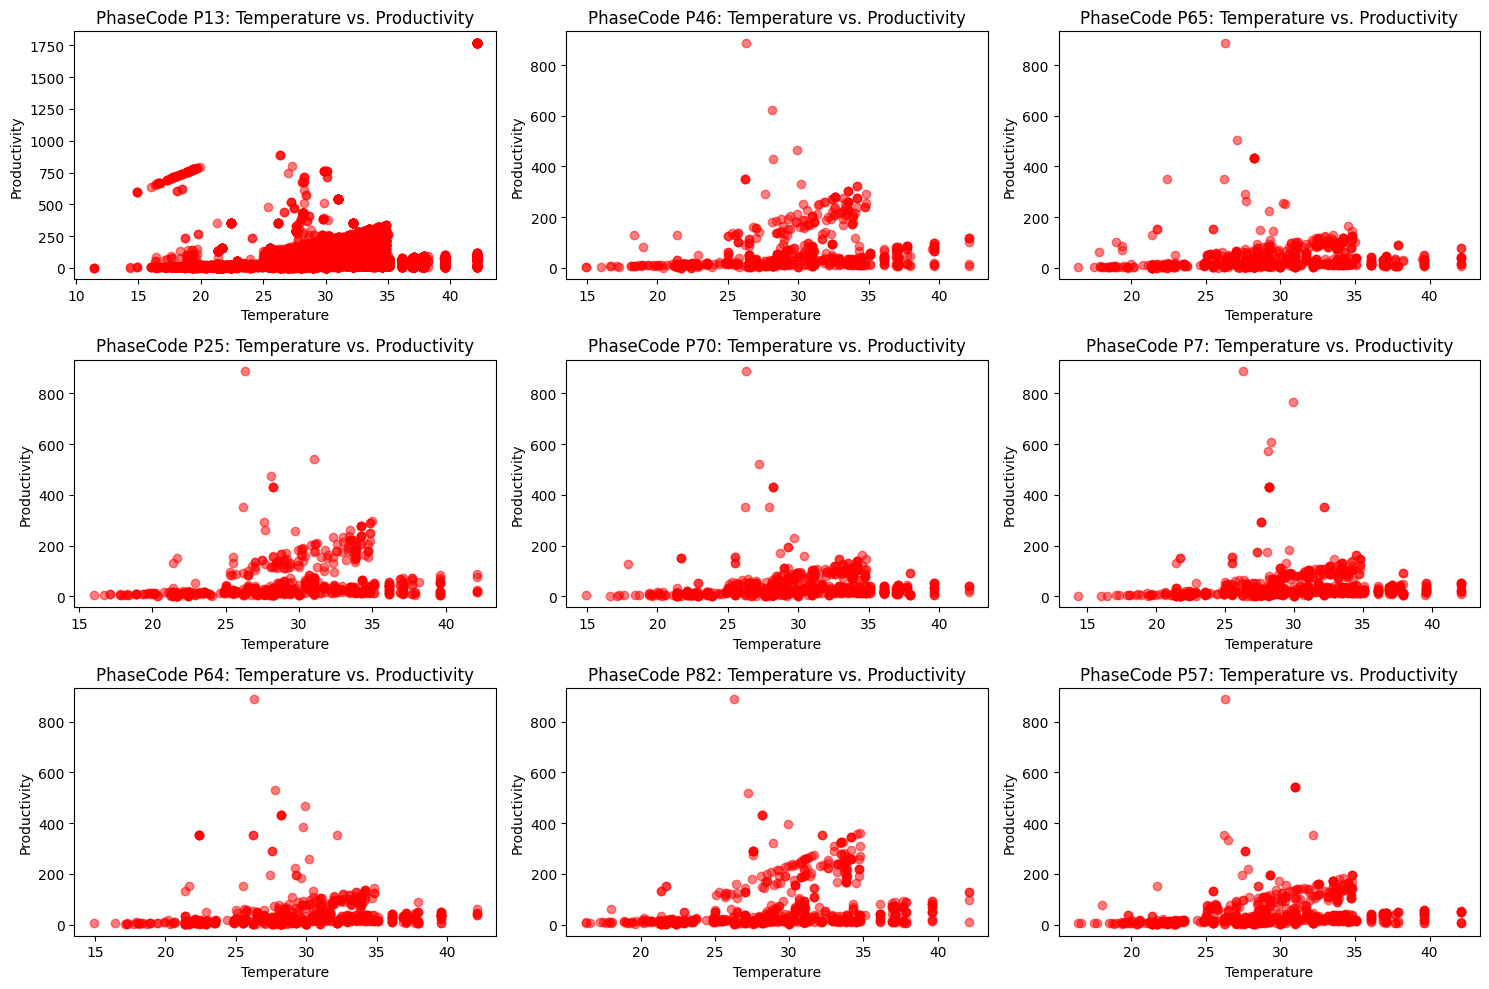

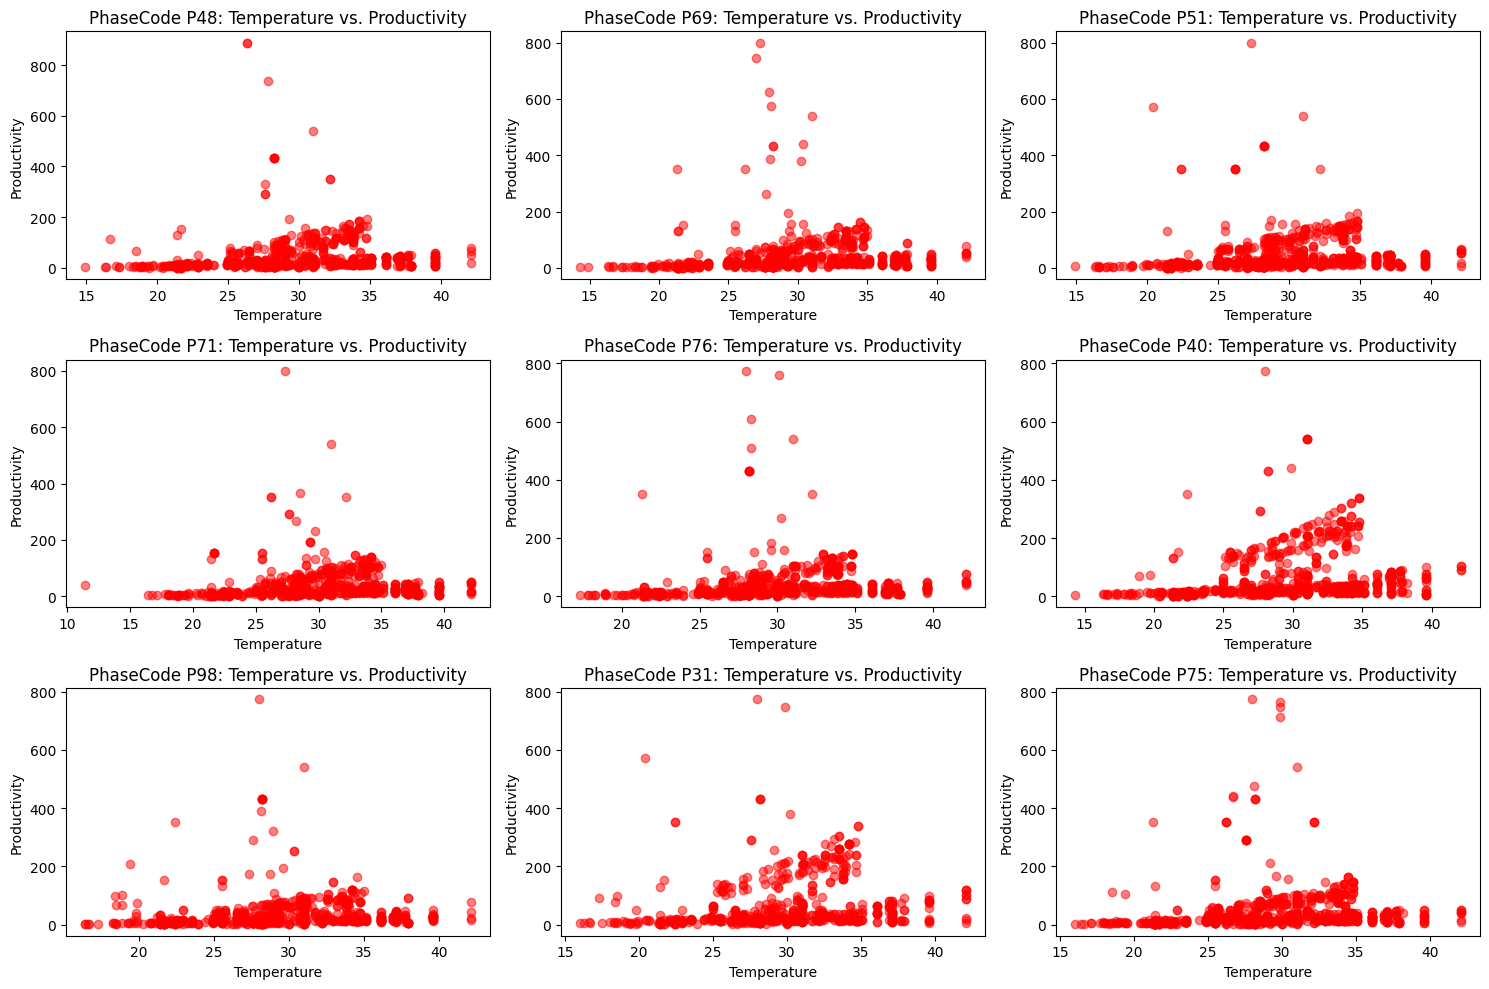

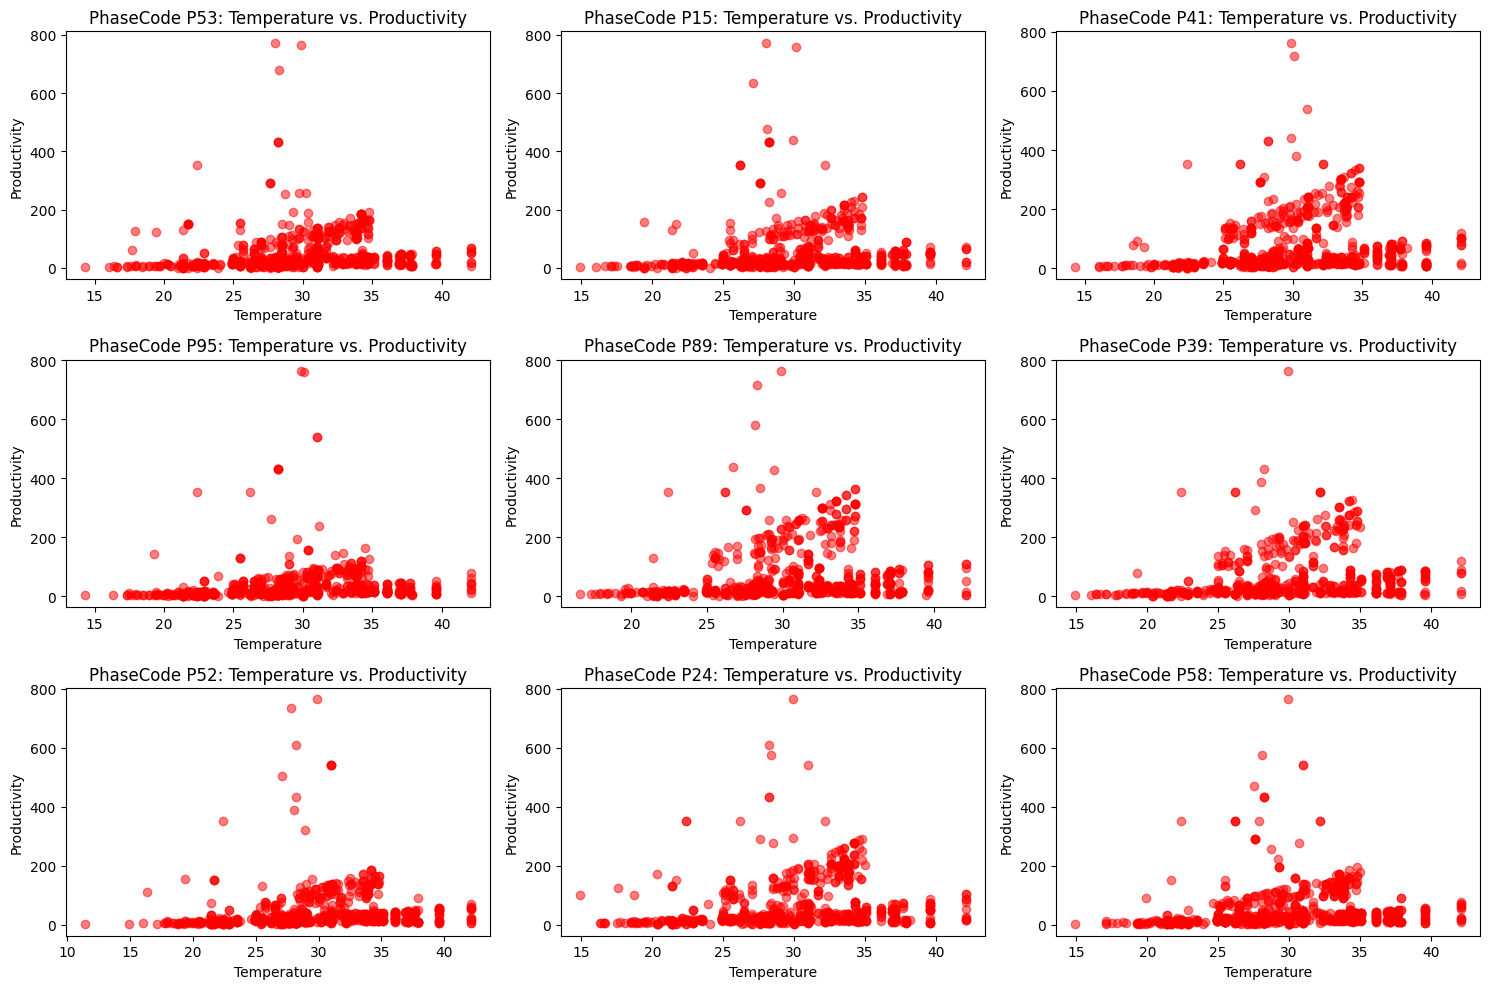

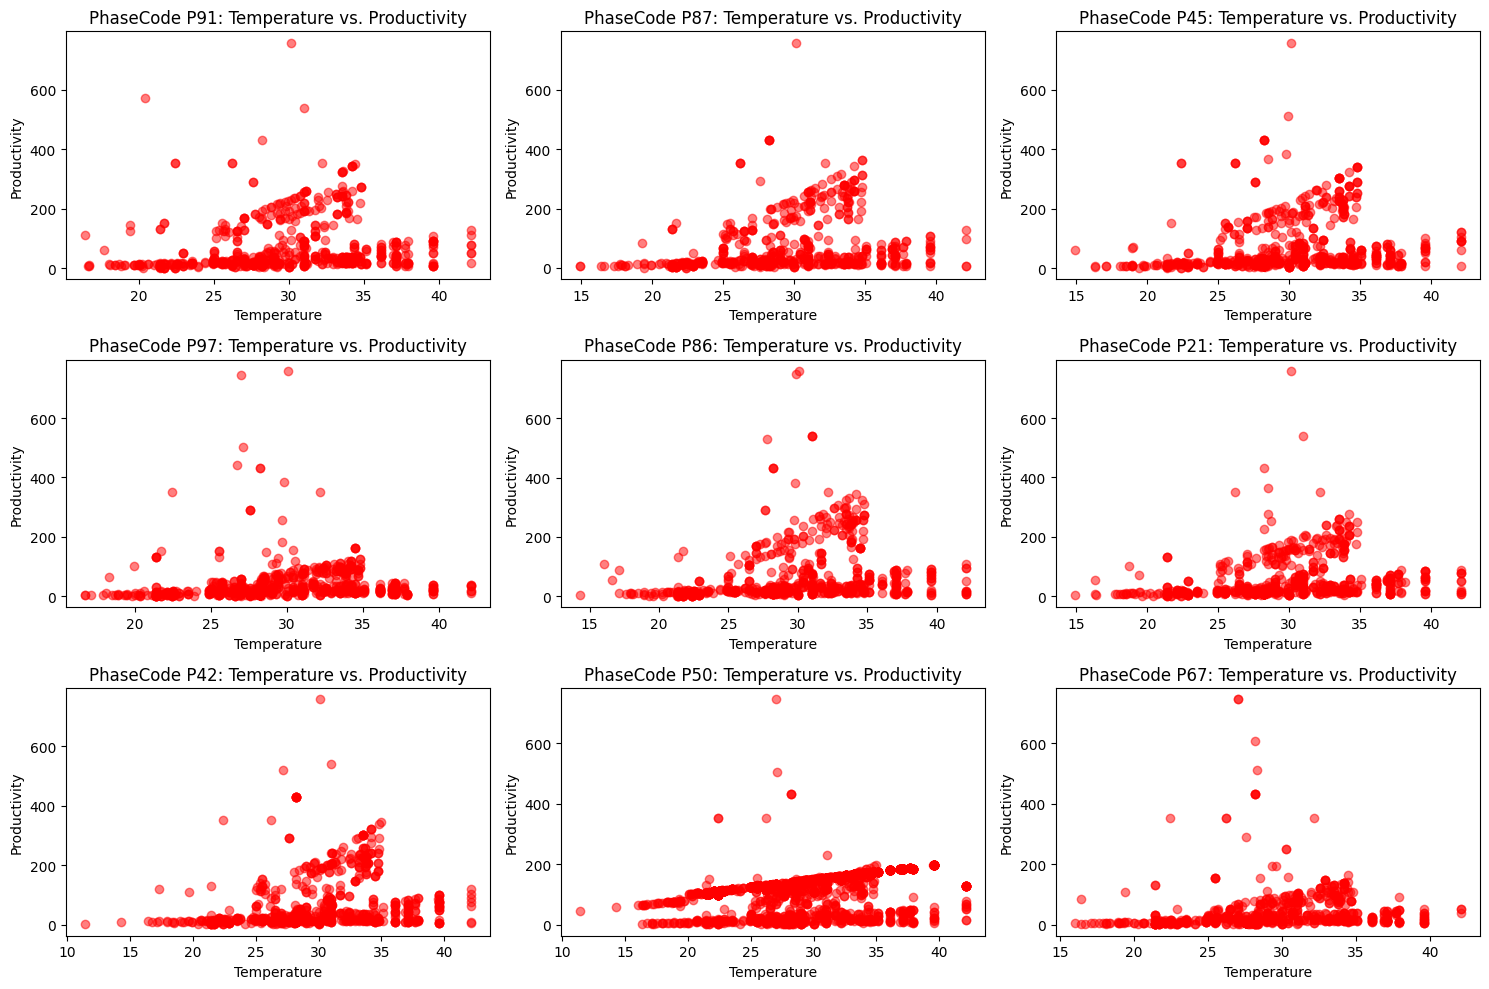

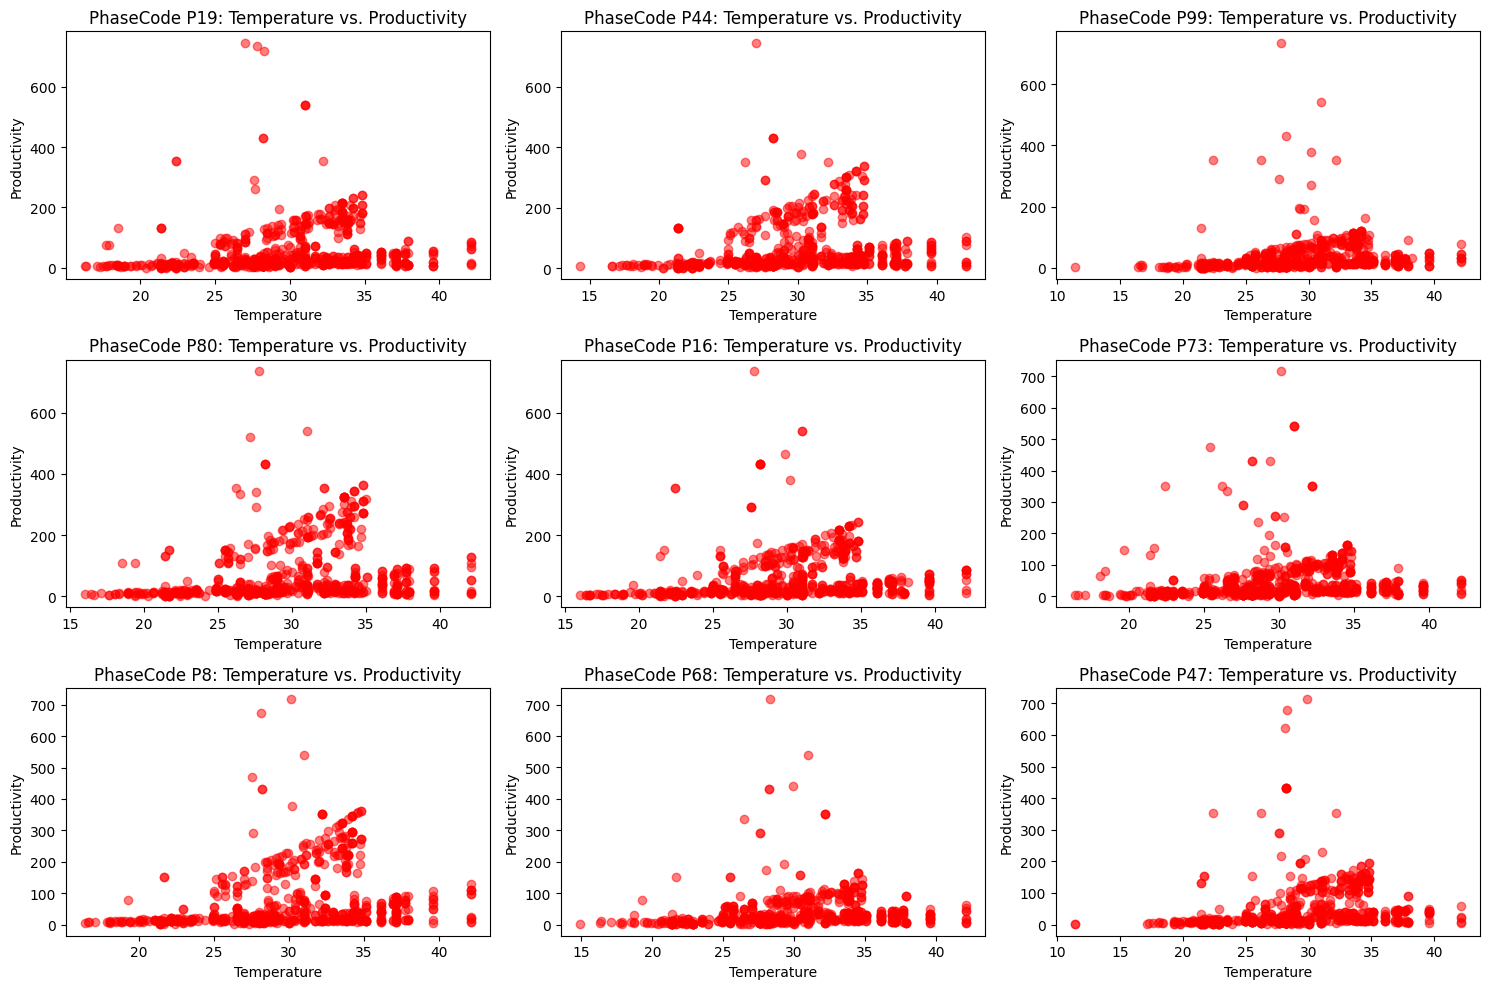

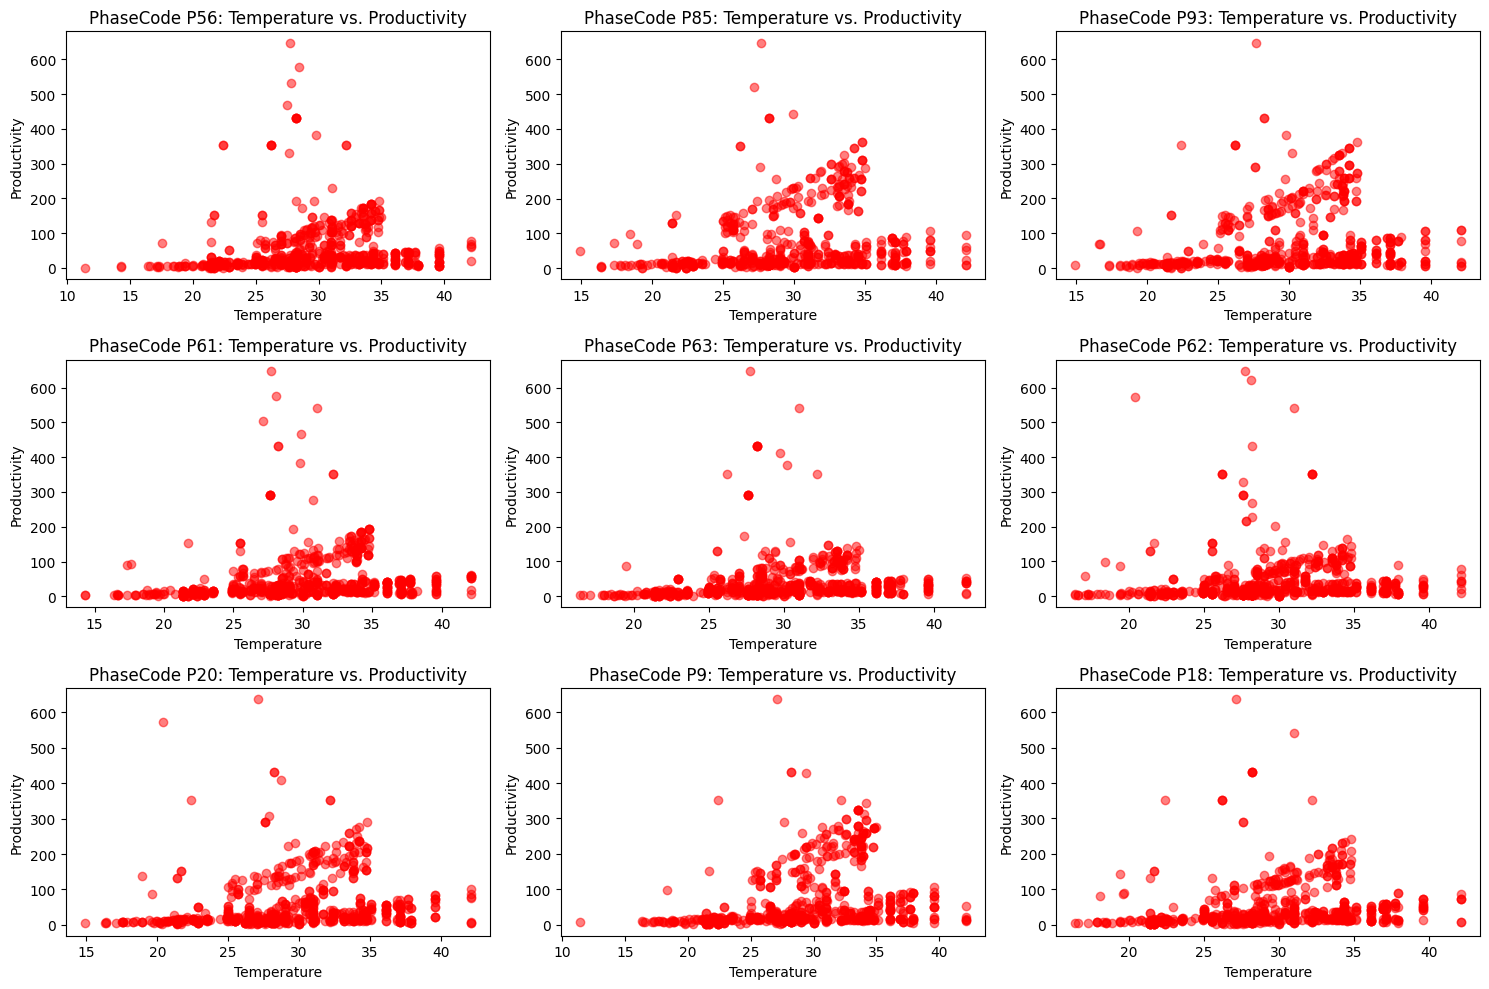

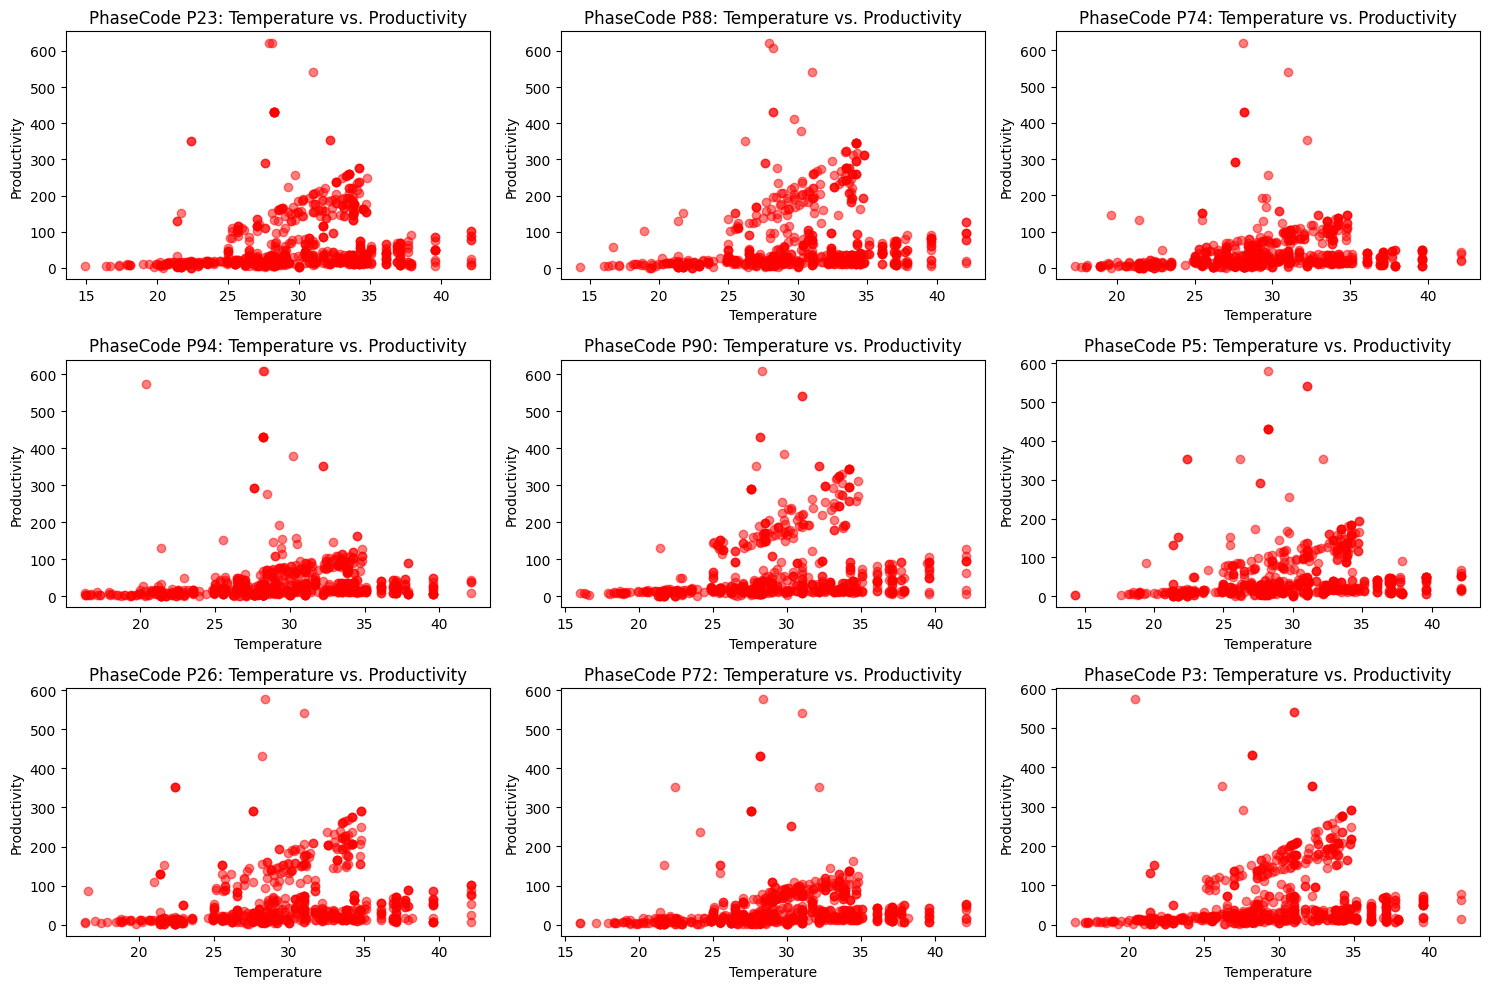

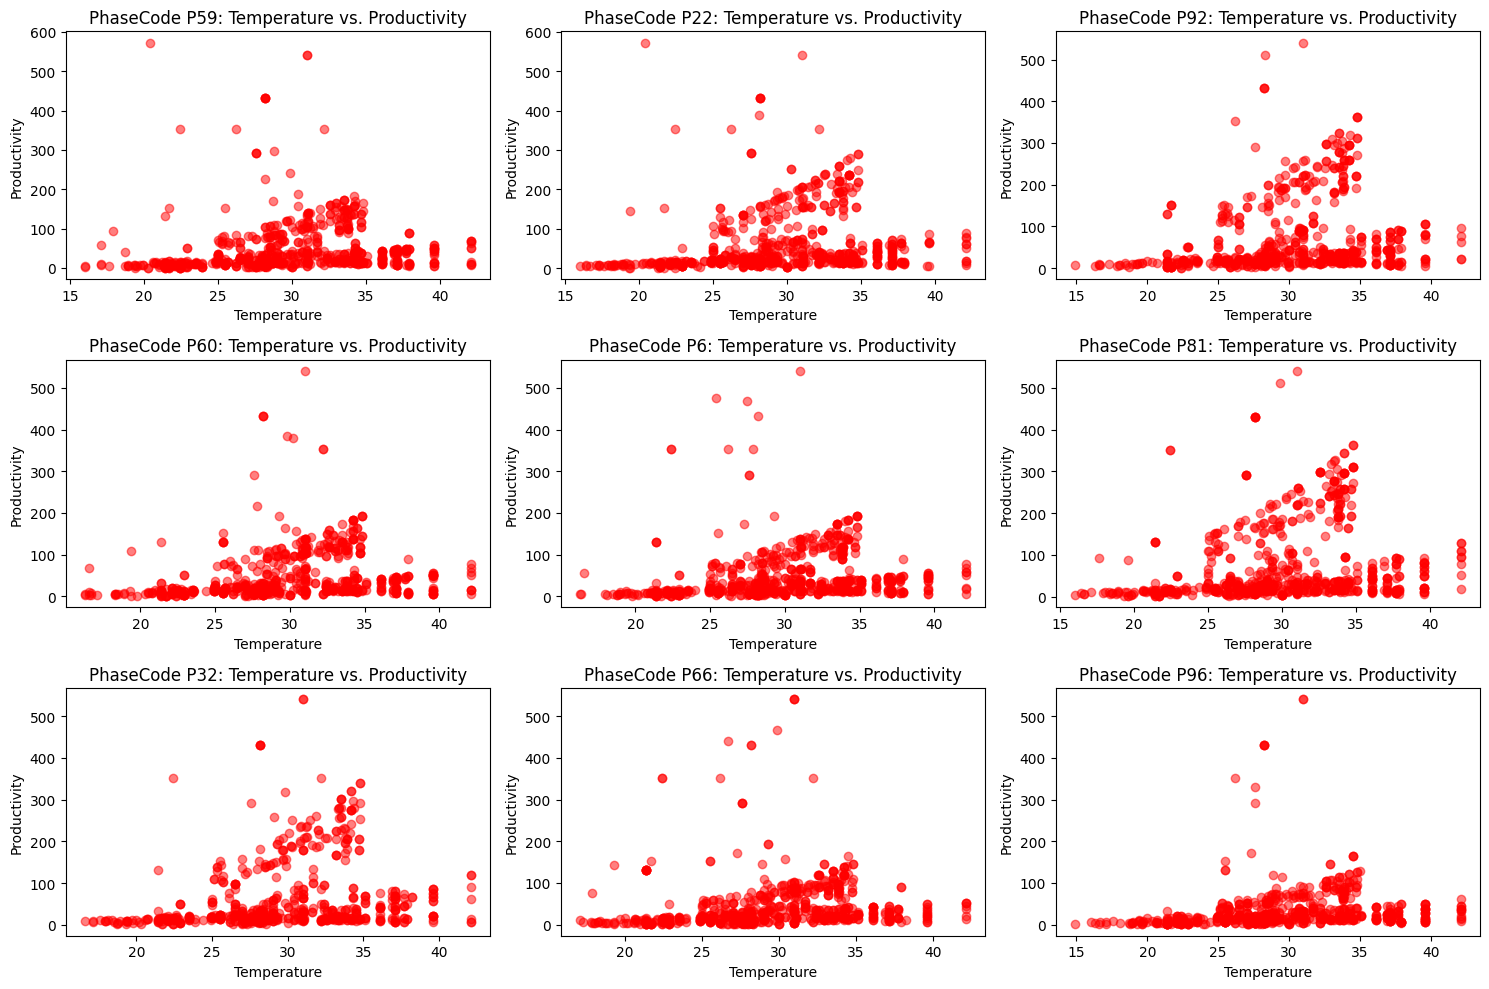

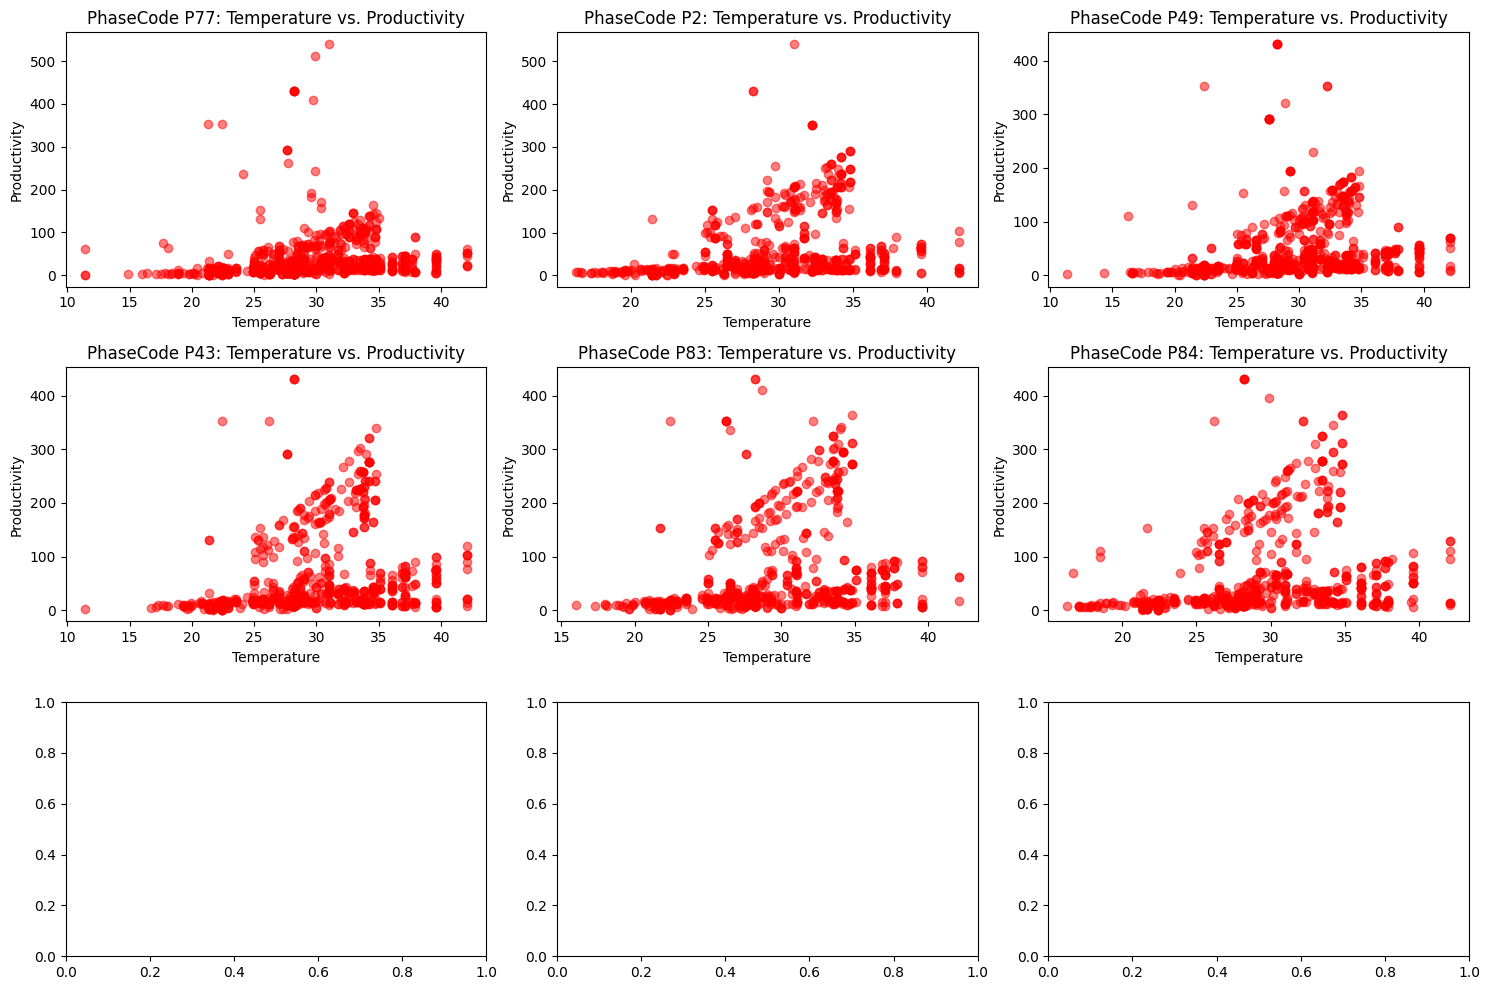

In [ ]:
import matplotlib.pyplot as plt

df = employee_data

phase_values = df["PhaseCode"].unique()

num_rows = 3
num_cols = 3

num_plots = len(phase_values)

plots_per_page = num_rows * num_cols

num_pages = -(-num_plots // plots_per_page)

for page in range(num_pages):
    start_index = page * plots_per_page
    end_index = min((page + 1) * plots_per_page, num_plots)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i, phase_index in enumerate(range(start_index, end_index)):
        row = i // num_cols
        col = i % num_cols

        phase_value = phase_values[phase_index]

        phase_data = df[df["PhaseCode"] == phase_value]

        rainfall_index = phase_data["Temperature"]
        productivity = phase_data["Productivity"]

        axs[row, col].scatter(rainfall_index, productivity, alpha=0.5, color='red')
        axs[row, col].set_title(f'PhaseCode {phase_value}: Temperature vs. Productivity')
        axs[row, col].set_xlabel('Temperature')
        axs[row, col].set_ylabel('Productivity')

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_crew = LabelEncoder()
label_encoder_phasecode = LabelEncoder()
crew_encoded = label_encoder_crew.fit_transform(df['Crew_ID'])
phasecode_encoded = label_encoder_phasecode.fit_transform(df['PhaseCode'])

crew_mapping = dict(zip(label_encoder_crew.classes_, label_encoder_crew.transform(label_encoder_crew.classes_)))

phasecode_mapping = dict(zip(label_encoder_phasecode.classes_, label_encoder_phasecode.transform(label_encoder_phasecode.classes_)))

print("Crew Label Encoding:")
for crew_label, crew_code in crew_mapping.items():
    print(f"{crew_label}: {crew_code}")

print("\nPhaseCode Label Encoding:")
for phasecode_label, phasecode_code in phasecode_mapping.items():
    print(f"{phasecode_label}: {phasecode_code}")

Crew Label Encoding:
C1: 0
C10: 1
C11: 2
C12: 3
C13: 4
C14: 5
C15: 6
C16: 7
C17: 8
C18: 9
C19: 10
C2: 11
C20: 12
C3: 13
C4: 14
C5: 15
C6: 16
C7: 17
C8: 18
C9: 19

PhaseCode Label Encoding:
P13: 0
P15: 1
P16: 2
P18: 3
P19: 4
P2: 5
P20: 6
P21: 7
P22: 8
P23: 9
P24: 10
P25: 11
P26: 12
P3: 13
P31: 14
P32: 15
P39: 16
P40: 17
P41: 18
P42: 19
P43: 20
P44: 21
P45: 22
P46: 23
P47: 24
P48: 25
P49: 26
P5: 27
P50: 28
P51: 29
P52: 30
P53: 31
P56: 32
P57: 33
P58: 34
P59: 35
P6: 36
P60: 37
P61: 38
P62: 39
P63: 40
P64: 41
P65: 42
P66: 43
P67: 44
P68: 45
P69: 46
P7: 47
P70: 48
P71: 49
P72: 50
P73: 51
P74: 52
P75: 53
P76: 54
P77: 55
P8: 56
P80: 57
P81: 58
P82: 59
P83: 60
P84: 61
P85: 62
P86: 63
P87: 64
P88: 65
P89: 66
P9: 67
P90: 68
P91: 69
P92: 70
P93: 71
P94: 72
P95: 73
P96: 74
P97: 75
P98: 76
P99: 77


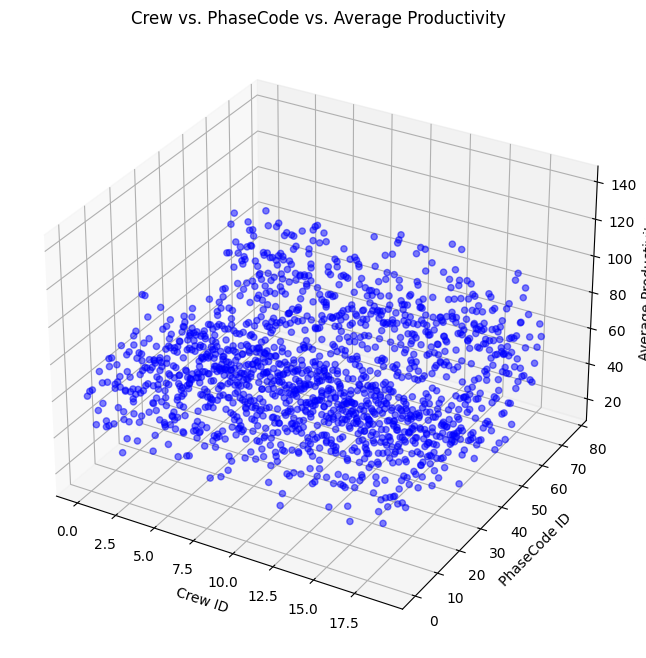

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

df = employee_data
label_encoder = LabelEncoder()
df['Crew_ID'] = label_encoder.fit_transform(df['Crew_ID'])
df['PhaseCode_ID'] = label_encoder.fit_transform(df['PhaseCode'])

avg_productivity = df.groupby(['Crew_ID', 'PhaseCode_ID'])['Productivity'].mean().reset_index()

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(avg_productivity['Crew_ID'], avg_productivity['PhaseCode_ID'], avg_productivity['Productivity'], c='blue', marker='o', alpha=0.5)

ax.set_xlabel('Crew ID')
ax.set_ylabel('PhaseCode ID')
ax.set_zlabel('Average Productivity')
ax.set_title('Crew vs. PhaseCode vs. Average Productivity')

plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

df = employee_data

label_encoder = LabelEncoder()
df['Crew_ID'] = label_encoder.fit_transform(df['Crew_ID'])
df['PhaseCode_ID'] = label_encoder.fit_transform(df['PhaseCode'])

# Group by Crew_ID and PhaseCode_ID and calculate the average productivity
avg_productivity = df.groupby(['Crew_ID', 'PhaseCode_ID'])['Productivity'].mean().reset_index()

fig = px.scatter_3d(avg_productivity, x='Crew_ID', y='PhaseCode_ID', z='Productivity', color='Productivity', opacity=0.7)
fig.update_layout(title='Crew vs. PhaseCode vs. Average Productivity',
                  scene=dict(
                      xaxis_title='Crew ID',
                      yaxis_title='PhaseCode ID',
                      zaxis_title='Average Productivity'
                  ))
fig.show()

In [ ]:
input_phase_code = input("Enter the PhaseCode to calculate average Productivity: ")

filtered_data = employee_data[employee_data['PhaseCode'] == input_phase_code]

if not filtered_data.empty:
    productivity_values = filtered_data['Productivity']

    average_productivity = productivity_values.mean()
    print(f"Average Productivity for PhaseCode {input_phase_code}: {average_productivity}")
else:
    print(f"No records found for PhaseCode {input_phase_code}.")


Enter the PhaseCode to calculate average Productivity: P50
Average Productivity for PhaseCode P50: 112.04488104173805


In [ ]:
input_phase_code2 = input("Enter the PhaseCode to calculate average Productivity: ")

input_crew_id = input("Enter the Crew to calculate average Productivity: ")

filtered_data = employee_data[employee_data['PhaseCode'] == input_phase_code2]

filtered_data2 = filtered_data[filtered_data['Crew_ID'] == input_crew_id]

if not filtered_data2.empty:
    productivity_values = filtered_data2['Productivity']

    average_productivity = productivity_values.mean()
    print(f"Average Productivity for PhaseCode {input_phase_code2}: {average_productivity}")
else:
    print(f"No records found for PhaseCode {input_phase_code2}.")


Enter the PhaseCode to calculate average Productivity: P50
Enter the Crew to calculate average Productivity: C9
Average Productivity for PhaseCode P50: 139.47274330097935


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

file_path = "/content/PP_JobPBI.csv"
job_data = pd.read_csv(file_path)

# Ensure date is in datetime
employee_data['Date'] = pd.to_datetime(employee_data['Date'])

# Select necessary columns for model data points
X = employee_data[['Date', 'Location', 'Crew_ID', 'PhaseCode', 'Rainfall_Index', 'Temperature']]  # Include 'Temperature'
y_productivity = employee_data['Productivity']  # Use 'Productivity' as the target variable

# Convert date to numerical representation
X['Date'] = X['Date'].astype(int)

# One-hot encode 'Location', 'Crew', and 'PhaseCode'
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[['Location', 'Crew_ID', 'PhaseCode']])
feature_names = list(encoder.get_feature_names_out(['Location', 'Crew_ID', 'PhaseCode']))
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X = pd.concat([X, X_encoded_df], axis=1)

# Drop the original columns
X = X.drop(['Location', 'Crew_ID', 'PhaseCode'], axis=1)

# Splitting data, training model
X_train, X_test, y_productivity_train, y_productivity_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

# Use XGBoost
productivity_model = XGBRegressor()
productivity_model.fit(X_train, y_productivity_train)

# Take user input for prediction
input_date_str = input("Enter the prediction Date (YYYY-MM-DD): ")
input_location = input("Enter the Location: ")
input_crew = input("Enter the Crew: ")
input_phase_code = input("Enter the PhaseCode: ")
input_rainfall_index = float(input("Enter the Rainfall Index: "))  # Include 'Rainfall Index'
input_temperature = float(input("Enter the Temperature: "))  # Include 'Temperature'

input_date = pd.to_datetime(input_date_str, errors='coerce')

if pd.notnull(input_date):
    # Convert input date to numerical representation
    input_date_numerical = np.array([input_date.timestamp()])

    # One-hot encode the input crew and phase code
    input_features_cat = np.array([[input_location, input_crew, input_phase_code]])
    input_features_cat_encoded = encoder.transform(input_features_cat)

    # Combine input features including 'Rainfall Index' and 'Temperature'
    input_features_combined = np.concatenate([input_date_numerical.reshape(1, -1),
                                              np.array([[input_rainfall_index, input_temperature]]),
                                              input_features_cat_encoded], axis=1)

    # Predict 'Productivity'
    predicted_productivity = productivity_model.predict(input_features_combined)

    productivity_model.save_model('productivity_model.xgb')
    # Create a DataFrame with the predicted values
    custom_input_predictions_df = pd.DataFrame({
        'Date': input_date,
        'Location': input_location,
        'Crew_ID': input_crew,
        'PhaseCode': input_phase_code,
        'Rainfall_Index': input_rainfall_index,
        'Temperature': input_temperature,
        'predicted_productivity': predicted_productivity
    })

    print("\nPredictions for the custom input date, location, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity':")
    print(custom_input_predictions_df)
    filtered_data = employee_data[employee_data['PhaseCode'] == input_phase_code]
    filtered_data2 = filtered_data[filtered_data['Crew_ID'] == input_crew]
    productivity_values = filtered_data['Productivity']
    productivity_values2 = filtered_data2['Productivity']
    average_productivity = productivity_values.mean()
    average_productivity2 = productivity_values2.mean()
    increase_in_productivity = predicted_productivity - average_productivity
    print(f"Average Productivity for PhaseCode {input_phase_code}: {average_productivity}")
    print(f"Average Productivity for Crew and Phase {input_phase_code}: {average_productivity2}")
    filtered_df = job_data[job_data['Phase_Code'] == input_phase_code]
    values_of_X = filtered_df['Unit_Of_Measurement'].values
    print("\033[95m\033[1mUnit of Measurement for PhaseCode", input_phase_code, ":", values_of_X)

    if increase_in_productivity>0:
      print(f"\033[92mIncrease in productivity = {increase_in_productivity}\033[0m")
      print("\033[92mProductive combination!\033[0m")

    else:
      print(f"\033[91mIncrease in productivity = {increase_in_productivity}\033[0m")
      print("\033[91mUnproductive, reconsider this job.\033[0m")
else:
    print("Invalid date format. Please enter a valid date in the format YYYY-MM-DD.")

<ipython-input-105-5d487dd1995d>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Enter the prediction Date (YYYY-MM-DD): 2024-01-01
Enter the Location: L4
Enter the Crew: C9
Enter the PhaseCode: P50
Enter the Rainfall Index: 100
Enter the Temperature: 28

Predictions for the custom input date, location, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity':
        Date Location Crew_ID PhaseCode  Rainfall_Index  Temperature  \
0 2024-01-01       L4      C9       P50           100.0         28.0   

   predicted_productivity  
0               31.778139  
Average Productivity for PhaseCode P50: 112.04488104173805
Average Productivity for Crew and Phase P50: 139.47274330097935
Unit of Measurement for PhaseCode P50 : [' Square Feet/Hour']
Increase in productivity = [-80.26675]
Unproductive, reconsider this job.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[09:20:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_test = productivity_model.predict(X_test)

r_squared = r2_score(y_productivity_test, y_pred_test)
print("R-squared score:", r_squared)


R-squared score: 0.7381628319959281


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Load the XGBoost model from the XGB format
productivity_model = XGBRegressor()
productivity_model.load_model('productivity_model.xgb')  # Load your trained XGBoost model

# Read the input data from the Excel file
input_data = pd.read_excel('Review Input.xlsx')  # Read your input Excel file

# Define a function to predict productivity for each row
def predict_productivity(row):
    # Prepare input features for prediction
    input_date = pd.to_datetime(row['Date'])
    input_date_numerical = np.array([input_date.timestamp()])
    input_location = row['Location']
    input_crew = row['Crew_ID']
    input_phase_code = row['PhaseCode']
    input_rainfall_index = row['Rainfall_Index']
    input_temperature = row['Temperature']

    # Convert input crew and phase code to one-hot encoded format
    input_features_cat = np.array([[input_location, input_crew, input_phase_code]])
    input_features_cat_encoded = encoder.transform(input_features_cat)

    # Combine input features including 'Rainfall Index' and 'Temperature'
    input_features_combined = np.concatenate([input_date_numerical.reshape(1, -1),
                                              np.array([[input_rainfall_index, input_temperature]]),
                                              input_features_cat_encoded], axis=1)

    # Predict 'Productivity'
    predicted_productivity = productivity_model.predict(input_features_combined)

    return predicted_productivity[0]

# Predict productivity for each row of the input data
input_data['predicted_productivity'] = input_data.apply(predict_productivity, axis=1)

# Create a DataFrame containing only the predicted productivity values
output_data = input_data['predicted_productivity']

# Specify the filename for the output Excel file
output_file = 'OutputFile.xlsx'

# Export the output DataFrame to Excel
output_data.to_excel(output_file, index=False, header=['Predicted_Productivity'])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_productivity_pred = productivity_model.predict(X_test)

r2 = r2_score(y_productivity_test, y_productivity_pred)

print(f'R-squared (R2): {r2}')


ValueError: Input contains NaN.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Assuming employee_data is your DataFrame

# Ensure 'Date' is in datetime format
employee_data['Date'] = pd.to_datetime(employee_data['Date'])

# Replace 'WorkDate' with 'Date' and select necessary columns
X = employee_data[['Date', 'Crew_ID', 'PhaseCode', 'Rainfall_Index', 'Temperature']]  # Include 'Temperature'
y_productivity = employee_data['Productivity']  # Use 'Productivity' as the target variable

# Convert 'Date' to numerical representation
X['Date'] = X['Date'].astype(int)

# One-hot encode 'Crew' and 'PhaseCode'
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
X_encoded = encoder.fit_transform(X[['Crew_ID', 'PhaseCode']])
feature_names = list(encoder.get_feature_names_out(['Crew_ID', 'PhaseCode']))
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X = pd.concat([X, X_encoded_df], axis=1)

# Drop the original 'Crew' and 'PhaseCode' columns
X = X.drop(['Crew_ID', 'PhaseCode'], axis=1)

# Splitting data, training models, etc.
X_train, X_test, y_productivity_train, y_productivity_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

# Use Random Forest for 'Productivity'
productivity_model_rf = RandomForestRegressor()
productivity_model_rf.fit(X_train, y_productivity_train)

# Take user input for prediction Date
input_date_str = input("Enter the prediction Date (YYYY-MM-DD): ")
input_crew = input("Enter the Crew: ")
input_phase_code = input("Enter the PhaseCode: ")
input_rainfall_index = float(input("Enter the Rainfall Index: "))  # Include 'Rainfall Index'
input_temperature = float(input("Enter the Temperature: "))  # Include 'Temperature'

input_date = pd.to_datetime(input_date_str, errors='coerce')

if pd.notnull(input_date):
    # Convert input date to numerical representation
    input_date_numerical = np.array([input_date.timestamp()])

    # One-hot encode the input crew and phase code
    input_features_cat = np.array([[input_crew, input_phase_code]])
    input_features_cat_encoded = encoder.transform(input_features_cat)

    # Combine input features including 'Rainfall Index' and 'Temperature'
    input_features_combined = np.concatenate([input_date_numerical.reshape(1, -1),
                                              np.array([[input_rainfall_index, input_temperature]]),
                                              input_features_cat_encoded], axis=1)

    # Predict 'Productivity' for the custom input date, crew, phase code, 'Rainfall Index', and 'Temperature'
    predicted_productivity_rf = productivity_model_rf.predict(input_features_combined)

    # Create a DataFrame with the predicted values for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity'
    custom_input_predictions_df_rf = pd.DataFrame({
        'Date': input_date,
        'Crew': input_crew,
        'PhaseCode': input_phase_code,
        'Rainfall Index': input_rainfall_index,
        'Temperature': input_temperature,
        'predicted_productivity': predicted_productivity_rf
    })

    print("\nPredictions for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity' with Random Forest:")
    print(custom_input_predictions_df_rf)
else:
    print("Invalid date format. Please enter a valid date in the format YYYY-MM-DD.")


<ipython-input-36-4cb7042f838d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = X['Date'].astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Enter the prediction Date (YYYY-MM-DD): 2025-02-05
Enter the Crew: C1
Enter the PhaseCode: P2
Enter the Rainfall Index: 0
Enter the Temperature: 33

Predictions for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity' with Random Forest:
        Date Crew PhaseCode  Rainfall Index  Temperature  \
0 2025-02-05   C1        P2             0.0         33.0   

   predicted_productivity  
0               16.142984  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict 'Productivity' for the test set
y_productivity_pred_rf = productivity_model_rf.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_productivity_test, y_productivity_pred_rf)

# Print the metrics
print(f'R-squared (R2) with Random Forest: {r2_rf:.2f}')


R-squared (R2) with Random Forest: 0.19


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Assuming employee_data is your DataFrame

# Ensure 'Date' is in datetime format
employee_data['Date'] = pd.to_datetime(employee_data['Date'])

# Replace 'WorkDate' with 'Date' and select necessary columns
X = employee_data[['Date', 'Crew_ID', 'PhaseCode', 'Rainfall_Index', 'Temperature']]  # Include 'Temperature'
y_productivity = employee_data['Productivity']  # Use 'Productivity' as the target variable

# Convert 'Date' to numerical representation
X['Date'] = X['Date'].astype(int)

# One-hot encode 'Crew' and 'PhaseCode'
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
X_encoded = encoder.fit_transform(X[['Crew_ID', 'PhaseCode']])
feature_names = list(encoder.get_feature_names_out(['Crew_ID', 'PhaseCode']))
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X = pd.concat([X, X_encoded_df], axis=1)

# Drop the original 'Crew' and 'PhaseCode' columns
X = X.drop(['Crew_ID', 'PhaseCode'], axis=1)

# Splitting data, training models, etc.
X_train, X_test, y_productivity_train, y_productivity_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

# Use KNN for 'Productivity'
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors based on your data
knn_model.fit(X_train, y_productivity_train)

# Take user input for prediction Date
input_date_str = input("Enter the prediction Date (YYYY-MM-DD): ")
input_crew = input("Enter the Crew: ")
input_phase_code = input("Enter the PhaseCode: ")
input_rainfall_index = float(input("Enter the Rainfall Index: "))  # Include 'Rainfall Index'
input_temperature = float(input("Enter the Temperature: "))  # Include 'Temperature'

input_date = pd.to_datetime(input_date_str, errors='coerce')

if pd.notnull(input_date):
    # Convert input date to numerical representation
    input_date_numerical = np.array([input_date.timestamp()])

    # One-hot encode the input crew and phase code
    input_features_cat = np.array([[input_crew, input_phase_code]])
    input_features_cat_encoded = encoder.transform(input_features_cat)

    # Combine input features including 'Rainfall Index' and 'Temperature'
    input_features_combined = np.concatenate([input_date_numerical.reshape(1, -1),
                                              np.array([[input_rainfall_index, input_temperature]]),
                                              input_features_cat_encoded], axis=1)

    # Predict 'Productivity' for the custom input date, crew, phase code, 'Rainfall Index', and 'Temperature' using KNN
    predicted_productivity_knn = knn_model.predict(input_features_combined)

    # Create a DataFrame with the predicted values for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity'
    custom_input_predictions_df_knn = pd.DataFrame({
        'Date': input_date,
        'Crew': input_crew,
        'PhaseCode': input_phase_code,
        'Rainfall Index': input_rainfall_index,
        'Temperature': input_temperature,
        'predicted_productivity': predicted_productivity_knn
    })

    print("\nPredictions for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity' using KNN:")
    print(custom_input_predictions_df_knn)

else:
    print("Invalid date format. Please enter a valid date in the format YYYY-MM-DD.")


<ipython-input-40-4c0ff8ca028c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = X['Date'].astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Enter the prediction Date (YYYY-MM-DD): 2024-02-01
Enter the Crew: C1
Enter the PhaseCode: P2
Enter the Rainfall Index: 0
Enter the Temperature: 33

Predictions for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity' using KNN:
        Date Crew PhaseCode  Rainfall Index  Temperature  \
0 2024-02-01   C1        P2             0.0         33.0   

   predicted_productivity  
0               75.180058  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score

# Assuming you have already made predictions (predicted_productivity_knn) and have the true values (y_productivity_test)
r_squared_knn = r2_score(y_productivity_test, knn_model.predict(X_test))

print(f"R-squared score for KNN: {r_squared_knn}")


R-squared score for KNN: -0.1791601349882972


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming employee_data is your DataFrame

# Ensure 'Date' is in datetime format
employee_data['Date'] = pd.to_datetime(employee_data['Date'])

# Replace 'WorkDate' with 'Date' and select necessary columns
X = employee_data[['Date', 'Crew_ID', 'PhaseCode', 'Rainfall_Index', 'Temperature']]  # Include 'Temperature'
y_productivity = employee_data['Productivity']  # Use 'Productivity' as the target variable

# Convert 'Date' to numerical representation
X['Date'] = X['Date'].astype(int)

# One-hot encode 'Crew' and 'PhaseCode'
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
X_encoded = encoder.fit_transform(X[['Crew_ID', 'PhaseCode']])
feature_names = list(encoder.get_feature_names_out(['Crew_ID', 'PhaseCode']))
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X = pd.concat([X, X_encoded_df], axis=1)

# Drop the original 'Crew' and 'PhaseCode' columns
X = X.drop(['Crew_ID', 'PhaseCode'], axis=1)

# Splitting data, training models, etc.
X_train, X_test, y_productivity_train, y_productivity_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression problems

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_productivity_train, epochs=50, batch_size=32, validation_data=(X_test, y_productivity_test))

# Make predictions
y_productivity_pred_nn = model.predict(X_test).flatten()

# Evaluate the model
mae_nn = mean_absolute_error(y_productivity_test, y_productivity_pred_nn)
mse_nn = mean_squared_error(y_productivity_test, y_productivity_pred_nn)
r2_nn = r2_score(y_productivity_test, y_productivity_pred_nn)

# Print the metrics
print(f'Mean Absolute Error (MAE) with Neural Network: {mae_nn:.2f}')
print(f'Mean Squared Error (MSE) with Neural Network: {mse_nn:.2f}')
print(f'R-squared (R2) with Neural Network: {r2_nn:.2f}')


<ipython-input-51-c10cd17ae929>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = X['Date'].astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
1851/1851 [==============================] - 4s 2ms/step - loss: nan - val_loss: nan
Epoch 2/50
1851/1851 [==============================] - 4s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
1851/1851 [==============================] - 4s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
1851/1851 [==============================] - 3s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
1851/1851 [==============================] - 4s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
1851/1851 [==============================] - 5s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
1851/1851 [==============================] - 4s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
1851/1851 [==============================] - 4s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
1851/1851 [==============================] - 5s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
1851/1851 [==============================] - 4s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
1851/1851 [================

ValueError: Input contains NaN.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Assuming employee_data is your DataFrame

# Ensure 'Date' is in datetime format
employee_data['Date'] = pd.to_datetime(employee_data['Date'])

# Replace 'WorkDate' with 'Date' and select necessary columns
X = employee_data[['Date', 'Crew_ID', 'PhaseCode', 'Rainfall_Index', 'Temperature']]  # Include 'Temperature'
y_productivity = employee_data['Productivity']  # Use 'Productivity' as the target variable

# Convert 'Date' to numerical representation
X['Date'] = X['Date'].astype(int)

# One-hot encode 'Crew' and 'PhaseCode'
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
X_encoded = encoder.fit_transform(X[['Crew_ID', 'PhaseCode']])
feature_names = list(encoder.get_feature_names_out(['Crew_ID', 'PhaseCode']))
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X = pd.concat([X, X_encoded_df], axis=1)

# Drop the original 'Crew' and 'PhaseCode' columns
X = X.drop(['Crew_ID', 'PhaseCode'], axis=1)

# Splitting data, training models, etc.
X_train, X_test, y_productivity_train, y_productivity_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

# Use Decision Tree for 'Productivity'
productivity_model = DecisionTreeRegressor()
productivity_model.fit(X_train, y_productivity_train)

# Take user input for prediction Date
input_date_str = input("Enter the prediction Date (YYYY-MM-DD): ")
input_crew = input("Enter the Crew: ")
input_phase_code = input("Enter the PhaseCode: ")
input_rainfall_index = float(input("Enter the Rainfall Index: "))  # Include 'Rainfall Index'
input_temperature = float(input("Enter the Temperature: "))  # Include 'Temperature'

input_date = pd.to_datetime(input_date_str, errors='coerce')

if pd.notnull(input_date):
    # Convert input date to numerical representation
    input_date_numerical = np.array([input_date.timestamp()])

    # One-hot encode the input crew and phase code
    input_features_cat = np.array([[input_crew, input_phase_code]])
    input_features_cat_encoded = encoder.transform(input_features_cat)

    # Combine input features including 'Rainfall Index' and 'Temperature'
    input_features_combined = np.concatenate([input_date_numerical.reshape(1, -1),
                                              np.array([[input_rainfall_index, input_temperature]]),
                                              input_features_cat_encoded], axis=1)

    # Predict 'Productivity' for the custom input date, crew, phase code, 'Rainfall Index', and 'Temperature'
    predicted_productivity = productivity_model.predict(input_features_combined)

    # Create a DataFrame with the predicted values for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity'
    custom_input_predictions_df = pd.DataFrame({
        'Date': input_date,
        'Crew': input_crew,
        'PhaseCode': input_phase_code,
        'Rainfall Index': input_rainfall_index,
        'Temperature': input_temperature,
        'predicted_productivity': predicted_productivity
    })

    print("\nPredictions for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity':")
    print(custom_input_predictions_df)
else:
    print("Invalid date format. Please enter a valid date in the format YYYY-MM-DD.")



<ipython-input-45-9d00d7e4dad5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = X['Date'].astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Enter the prediction Date (YYYY-MM-DD): 2024-01-01
Enter the Crew: C1
Enter the PhaseCode: P1
Enter the Rainfall Index: 0
Enter the Temperature: 41

Predictions for the custom input date, crew, phase code, 'Rainfall Index', 'Temperature', and 'Productivity':
        Date Crew PhaseCode  Rainfall Index  Temperature  \
0 2024-01-01   C1        P1             0.0         41.0   

   predicted_productivity  
0                 77.7275  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score

# Predict on the test set
y_productivity_pred = productivity_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_productivity_test, y_productivity_pred)

print(f'R2 Score on Test Set: {r2}')

R2 Score on Test Set: -0.49689007208740366


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming employee_data is your DataFrame

# Ensure 'Date' is in datetime format
employee_data['Date'] = pd.to_datetime(employee_data['Date'])

# Replace 'WorkDate' with 'Date' and select necessary columns
X = employee_data[['Date', 'Crew_ID', 'PhaseCode', 'Rainfall_Index', 'Temperature']]  # Include 'Temperature'
y_hours = employee_data['ActualHours']
y_quantity = employee_data['ActualQuantity']

# Convert 'Date' to numerical representation
X['Date'] = X['Date'].astype(int)

# One-hot encode 'Crew' and 'PhaseCode'
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
X_encoded = encoder.fit_transform(X[['Crew_ID', 'PhaseCode']])
feature_names = list(encoder.get_feature_names_out(['Crew_ID', 'PhaseCode']))
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X = pd.concat([X, X_encoded_df], axis=1)

# Drop the original 'Crew' and 'PhaseCode' columns
X = X.drop(['Crew_ID', 'PhaseCode'], axis=1)

# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting data, training models, etc.
X_train, X_test, y_hours_train, y_hours_test, y_quantity_train, y_quantity_test = train_test_split(X_normalized, y_hours, y_quantity, test_size=0.2, random_state=42)

# Use Linear Regression for 'Actual Hours'
hours_model = LinearRegression()
hours_model.fit(X_train, y_hours_train)

# Use Linear Regression for 'Actual Quantity'
quantity_model = LinearRegression()
quantity_model.fit(X_train, y_quantity_train)

# Take user input for prediction Date
input_date_str = input("Enter the prediction Date (YYYY-MM-DD): ")
input_crew = input("Enter the Crew: ")
input_phase_code = input("Enter the PhaseCode: ")
input_rainfall_index = float(input("Enter the Rainfall Index: "))  # Include 'Rainfall Index'
input_temperature = float(input("Enter the Temperature: "))  # Include 'Temperature'

input_date = pd.to_datetime(input_date_str, errors='coerce')

if pd.notnull(input_date):
    # Convert input date to numerical representation
    input_date_numerical = np.array([input_date.timestamp()])

    # One-hot encode the input crew and phase code
    input_features_cat = np.array([[input_crew, input_phase_code]])
    input_features_cat_encoded = encoder.transform(input_features_cat)

    # Combine input features including 'Rainfall Index' and 'Temperature'
    input_features_combined = np.concatenate([input_date_numerical.reshape(1, -1),
                                              np.array([[input_rainfall_index, input_temperature]]),
                                              input_features_cat_encoded], axis=1)

    # Normalize the input features
    input_features_normalized = scaler.transform(input_features_combined)

    # Predict hours and quantity for the custom input date, crew, phase code, 'Rainfall Index', and 'Temperature'
    predicted_hours = hours_model.predict(input_features_normalized)
    predicted_quantity = quantity_model.predict(input_features_normalized)

    # Create a DataFrame with the predicted values for the custom input date, crew, phase code, 'Rainfall Index', and 'Temperature'
    custom_input_predictions_df = pd.DataFrame({
        'Date': input_date,
        'Crew': input_crew,
        'PhaseCode': input_phase_code,
        'Rainfall Index': input_rainfall_index,
        'Temperature': input_temperature,
        'predicted_hours': predicted_hours,
        'predicted_quantity': predicted_quantity
    })

    print("\nPredictions for the custom input date, crew, phase code, 'Rainfall Index', and 'Temperature':")
    print(custom_input_predictions_df)
else:
    print("Invalid date format. Please enter a valid date in the format YYYY-MM-DD.")


<ipython-input-49-0fe63e3a84c0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = X['Date'].astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Enter the prediction Date (YYYY-MM-DD): 2023-01-01
Enter the Crew: C2
Enter the PhaseCode: P2
Enter the Rainfall Index: 0
Enter the Temperature: 33

Predictions for the custom input date, crew, phase code, 'Rainfall Index', and 'Temperature':
        Date Crew PhaseCode  Rainfall Index  Temperature  predicted_hours  \
0 2023-01-01   C2        P2             0.0         33.0        14.901665   

   predicted_quantity  
0          523.352161  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score

# Predict on the test set
y_hours_pred = hours_model.predict(X_test)

# Calculate R-squared
r2_hours = r2_score(y_hours_test, y_hours_pred)

print(f'R-squared for Actual Hours: {r2_hours}')


R-squared for Actual Hours: 0.11122628030755766
